In [13]:
import base64
import json
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

def return_prediction(
    image_path: str, custom_id: str
):
    
    # Load and encode the image to base64
    load_dotenv()

# OpenAI API Key
    api_key = os.getenv("OPENAI_API_KEY")
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()
        encoded_image = base64.b64encode(image_data).decode("utf-8")

    print(f"Encoded Image Length: {len(encoded_image)} for {custom_id}")

    headers = {"Content-Type": "application/json", "Authorization": f"Bearer {api_key}"}

    # Prepare the payload with the encoded image and custom ID
    payload = {
        "model": "gpt-4o-mini",
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Act as an object detection model you need to detect workers and visitors based on uniform/outfit wearing if worker then classes will be (White Rubber Boots, Brown Pants, Knee Protector, Brown Long Sleeves Shirt, Glasses, Gloves, Gas Mask, ) For protective gear like knee protector, gloves and gas mask if you think that a worker is wearing but is hidden by any obstacle in picture then this particular class value will be in negative and if any class is not detected it will be zero probability. If outsider then classes will be (crocs). For each person you will only return output in form of python dictionary with each class as key and detected probability of that class, if a particular class is not detected its probability will be zero ,probability will always be in float return this as list of dictionaries if multiple people in frame. do not return any other text or information.",
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"},
                    },
                ],
            }
        ],
        "max_tokens": 300,
    }

    # Send the request to the OpenAI API
    response = requests.post(
        "https://api.openai.com/v1/chat/completions", headers=headers, json=payload
    )
    response_data = response.json()
    # print("API Response:", response_data)

    # Parse the response to extract detections
    detection_content = response_data['choices'][0]['message']['content']

        # Clean the response and remove the code block markers, if present
    detection_content = detection_content.strip().strip('```python').strip().strip('```')

        # Convert the string into a Python object (list of dictionaries)
    detections = json.loads(detection_content)
    print(detections)

    # Display the image using matplotlib
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # No axis for the image
    plt.show()


In [2]:
def get_readable_output(detections):
    output = ""
    required_items = ['White Rubber Boots', 'Brown Pants', 'Knee Protector', 
                      'Brown Long Sleeves Shirt', 'Glasses', 'Gloves', 'Gas Mask']
    
    for idx, person_detection in enumerate(detections):
        wearing_items = []
        not_wearing_items = []
        detection_failed_items = []

        # Categorize the items based on the detection values
        for clothing_item, detection_value in person_detection.items():
            if detection_value > 0:
                wearing_items.append(clothing_item)
            elif detection_value == 0:
                not_wearing_items.append(clothing_item)
            else:
                detection_failed_items.append(clothing_item)

        # Check if the person is a visitor (i.e., not wearing all required items)
        is_visitor = all(person_detection.get(item, -1) == 0 for item in required_items)

        if is_visitor:
            person_label = "Visitor"
        else:
            person_label = "Worker"

        # Create the final sentence for this person
        output += f"{person_label} {idx + 1} is wearing " + ", ".join(wearing_items) + "."

        if not_wearing_items:
            output += f" However, they are not wearing " + ", ".join(not_wearing_items) + "."

        if detection_failed_items:
            output += f" Detection failed due to occlusion for " + ", ".join(detection_failed_items) + "."

        output += "\n"  # Add a new line for clarity between workers/visitors

    return output
dict=[{'White Rubber Boots': 0.9, 'Brown Pants': 0.8, 'Knee Protector': -0.5, 'Brown Long Sleeves Shirt': 0.8, 'Glasses': 0.0, 'Gloves': -0.5, 'Gas Mask': -0.5, 'crocs': 0.0}, {'White Rubber Boots': 0.0, 'Brown Pants': 0.0, 'Knee Protector': 0.0, 'Brown Long Sleeves Shirt': 0.0, 'Glasses': 0.0, 'Gloves': 0.0, 'Gas Mask': 0.0, 'crocs': 0.7}]

get_readable_output(dict)

'Worker 1 is wearing White Rubber Boots, Brown Pants, Brown Long Sleeves Shirt. However, they are not wearing Glasses, crocs. Detection failed due to occlusion for Knee Protector, Gloves, Gas Mask.\nVisitor 2 is wearing crocs. However, they are not wearing White Rubber Boots, Brown Pants, Knee Protector, Brown Long Sleeves Shirt, Glasses, Gloves, Gas Mask.\n'

Encoded Image Length: 249432 for 1
[{'White Rubber Boots': 0.9, 'Brown Pants': 0.8, 'Knee Protector': -0.5, 'Brown Long Sleeves Shirt': 0.8, 'Glasses': 0.0, 'Gloves': -0.5, 'Gas Mask': -0.5, 'crocs': 0.0}, {'White Rubber Boots': 0.0, 'Brown Pants': 0.0, 'Knee Protector': 0.0, 'Brown Long Sleeves Shirt': 0.0, 'Glasses': 0.0, 'Gloves': 0.0, 'Gas Mask': 0.0, 'crocs': 0.7}]


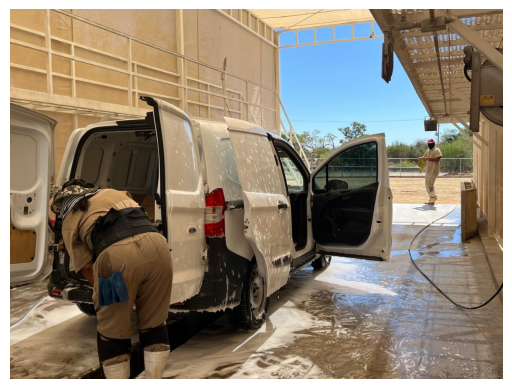

In [14]:
return_prediction("images/215.jpeg",1)

Image ID: image-1
{'id': 'chatcmpl-9uEXS5m1XbKQE1gzI9TIuq6BxUsTs', 'object': 'chat.completion', 'created': 1723189282, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n{}\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 5, 'total_tokens': 25598}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-2
{'id': 'chatcmpl-9uEXVZfv13q5C7orCcJvcRQo93NCA', 'object': 'chat.completion', 'created': 1723189285, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 5, 'total_tokens': 25598}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-3
{'id': 'chatcmpl-9uEXYlwinO9XKv40DTidkonP0nlyN', 'object': 'chat.completion', 'created': 1723189288, 'model': 'gpt-4o-mi

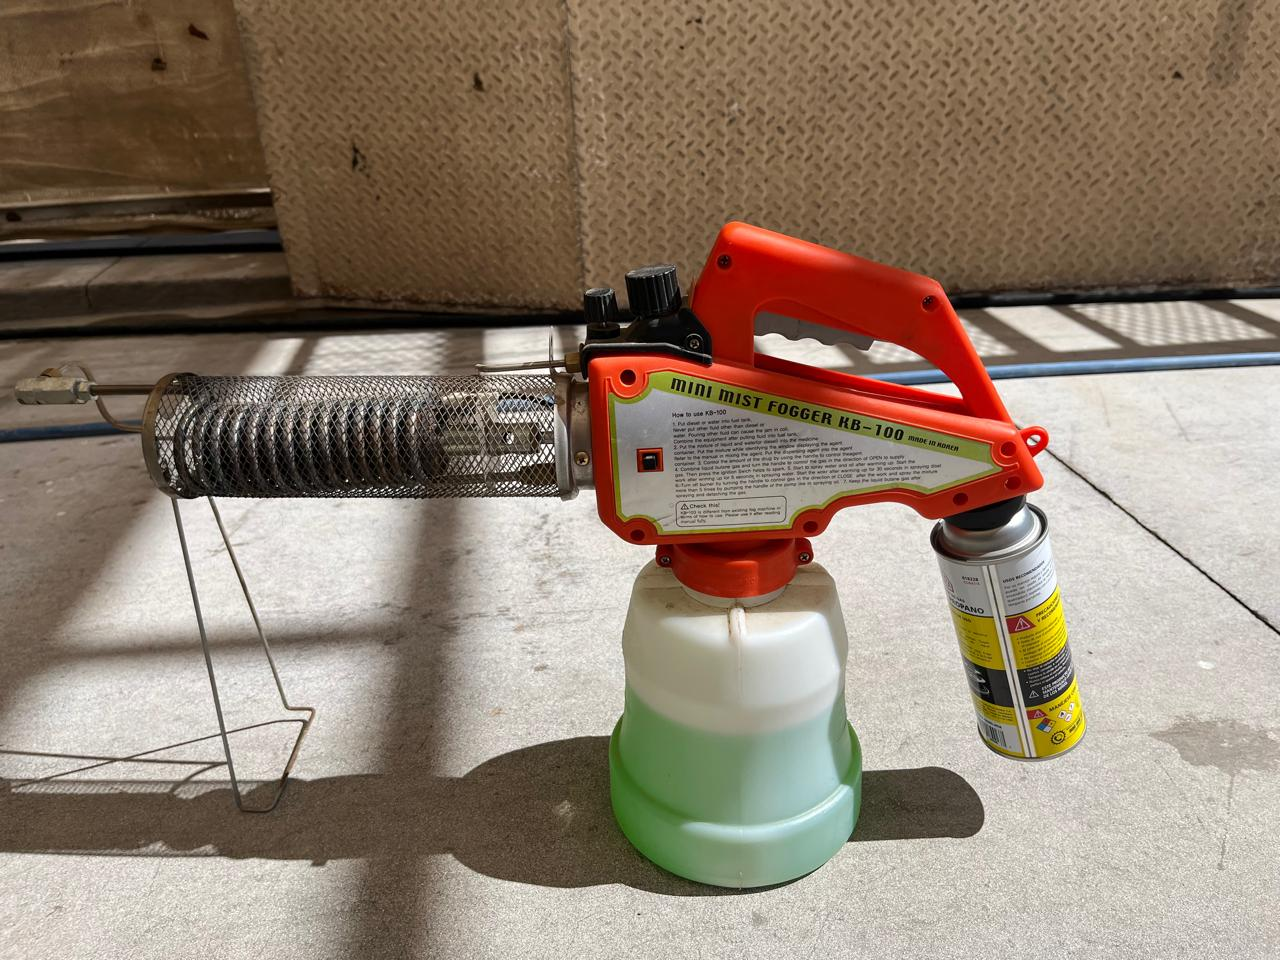

{'id': 'chatcmpl-9uEXS5m1XbKQE1gzI9TIuq6BxUsTs', 'object': 'chat.completion', 'created': 1723189282, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n{}\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 5, 'total_tokens': 25598}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-2


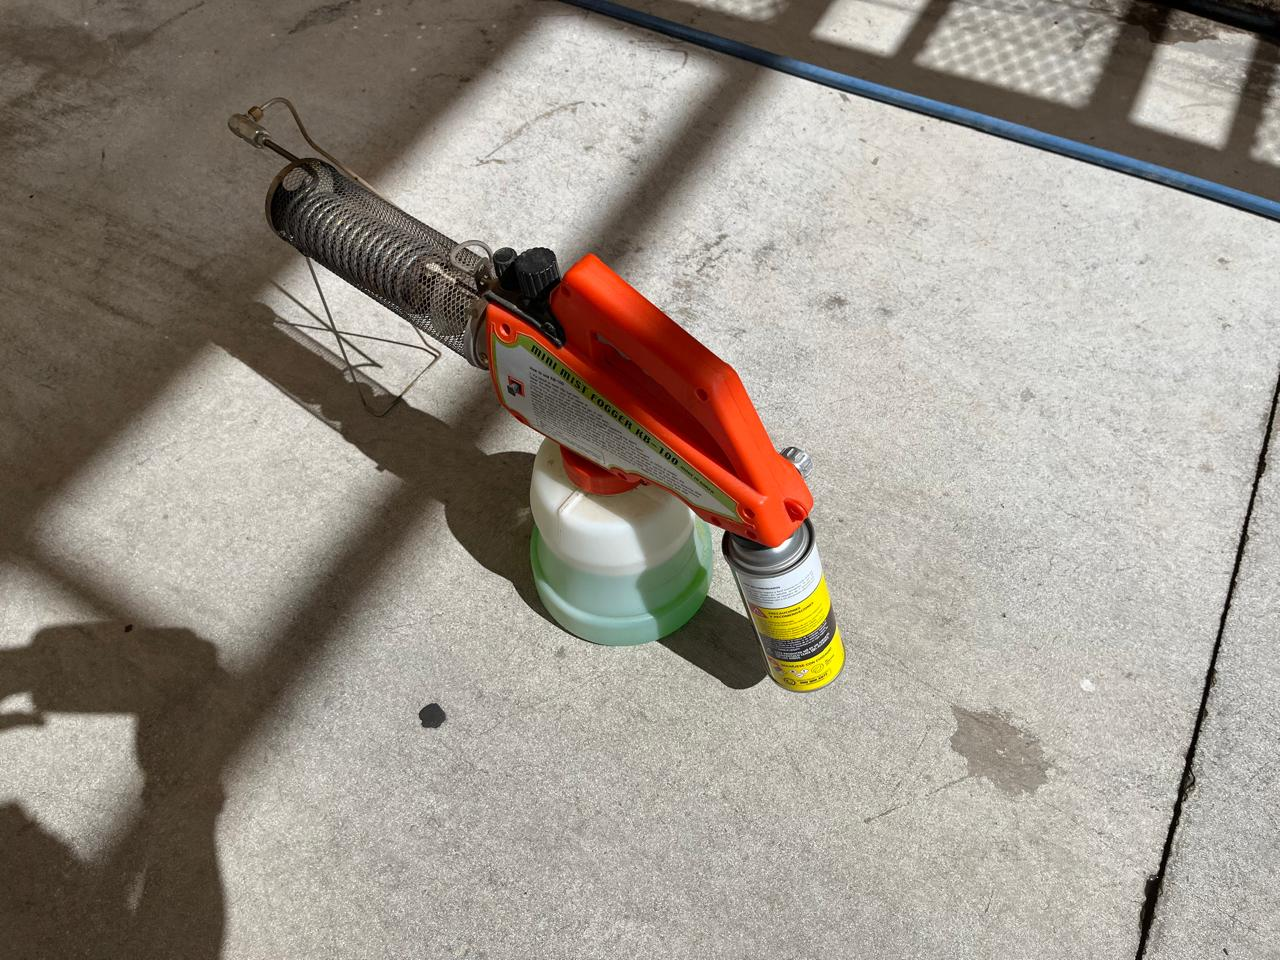

{'id': 'chatcmpl-9uEXVZfv13q5C7orCcJvcRQo93NCA', 'object': 'chat.completion', 'created': 1723189285, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 5, 'total_tokens': 25598}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-3


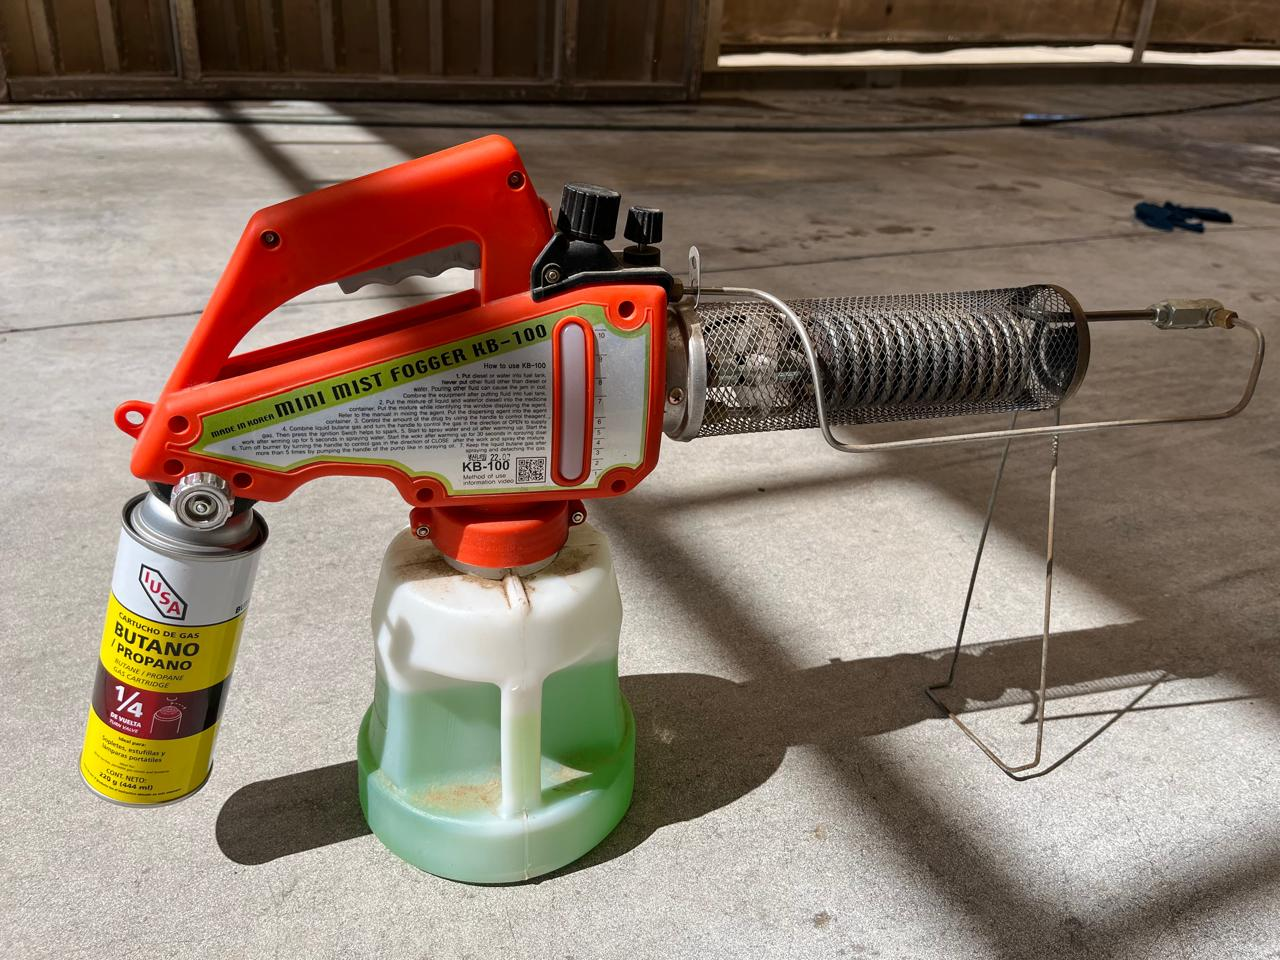

{'id': 'chatcmpl-9uEXYlwinO9XKv40DTidkonP0nlyN', 'object': 'chat.completion', 'created': 1723189288, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '{}', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 1, 'total_tokens': 25594}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-4


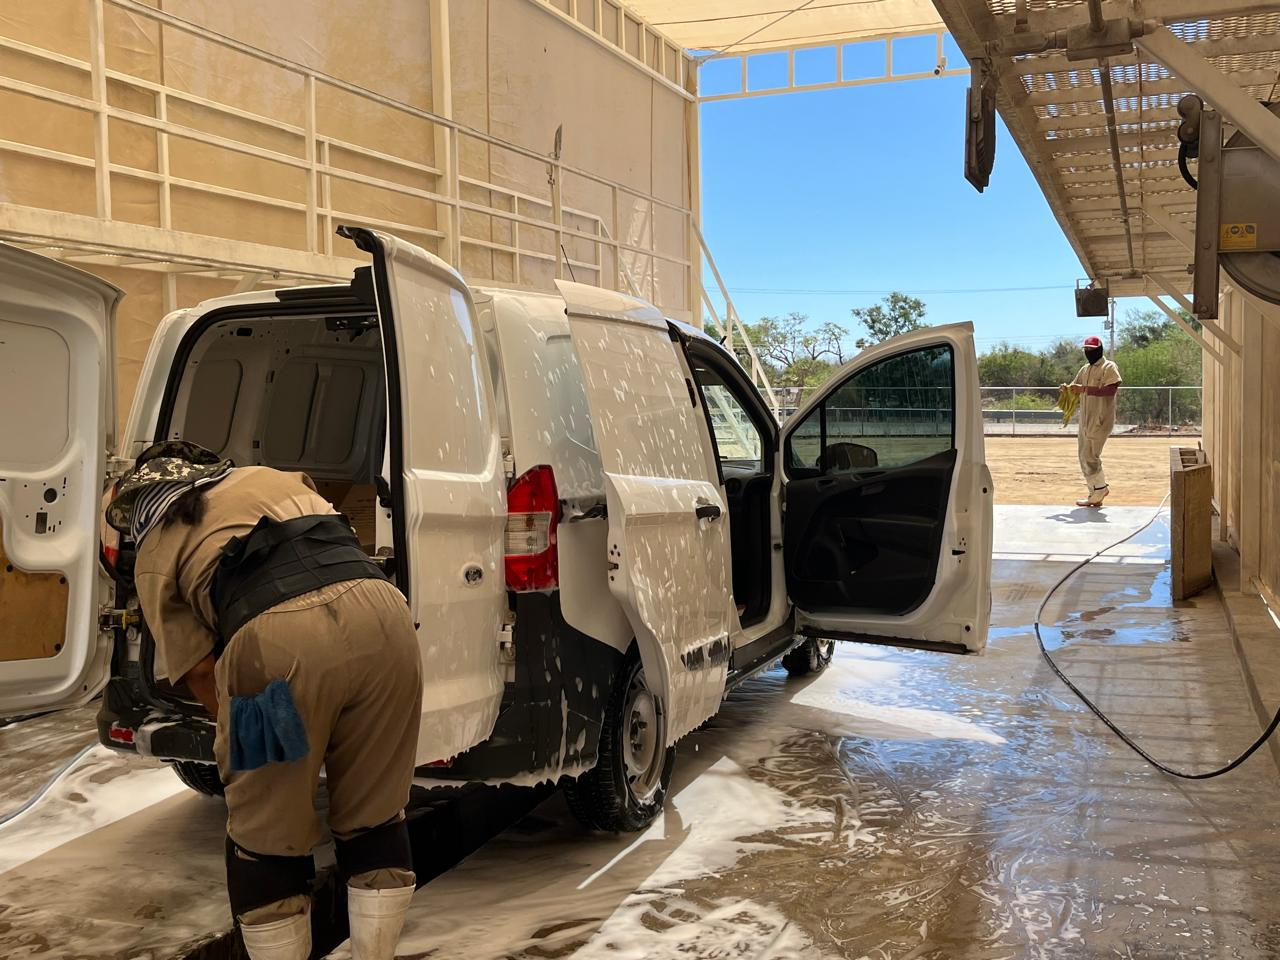

{'id': 'chatcmpl-9uEXchYghmKTR914Q6Vh6dqcaAC72', 'object': 'chat.completion', 'created': 1723189292, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[\n    {\n        "White Rubber Boots": 0.9,\n        "Brown Pants": 0.8,\n        "Knee Protector": 0.7,\n        "Brown Long Sleeves Shirt": 0.6,\n        "Glasses": 0.1,\n        "Gloves": 0.7,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.0,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.9,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    }\n]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 164, 'total_tokens': 25757}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-5


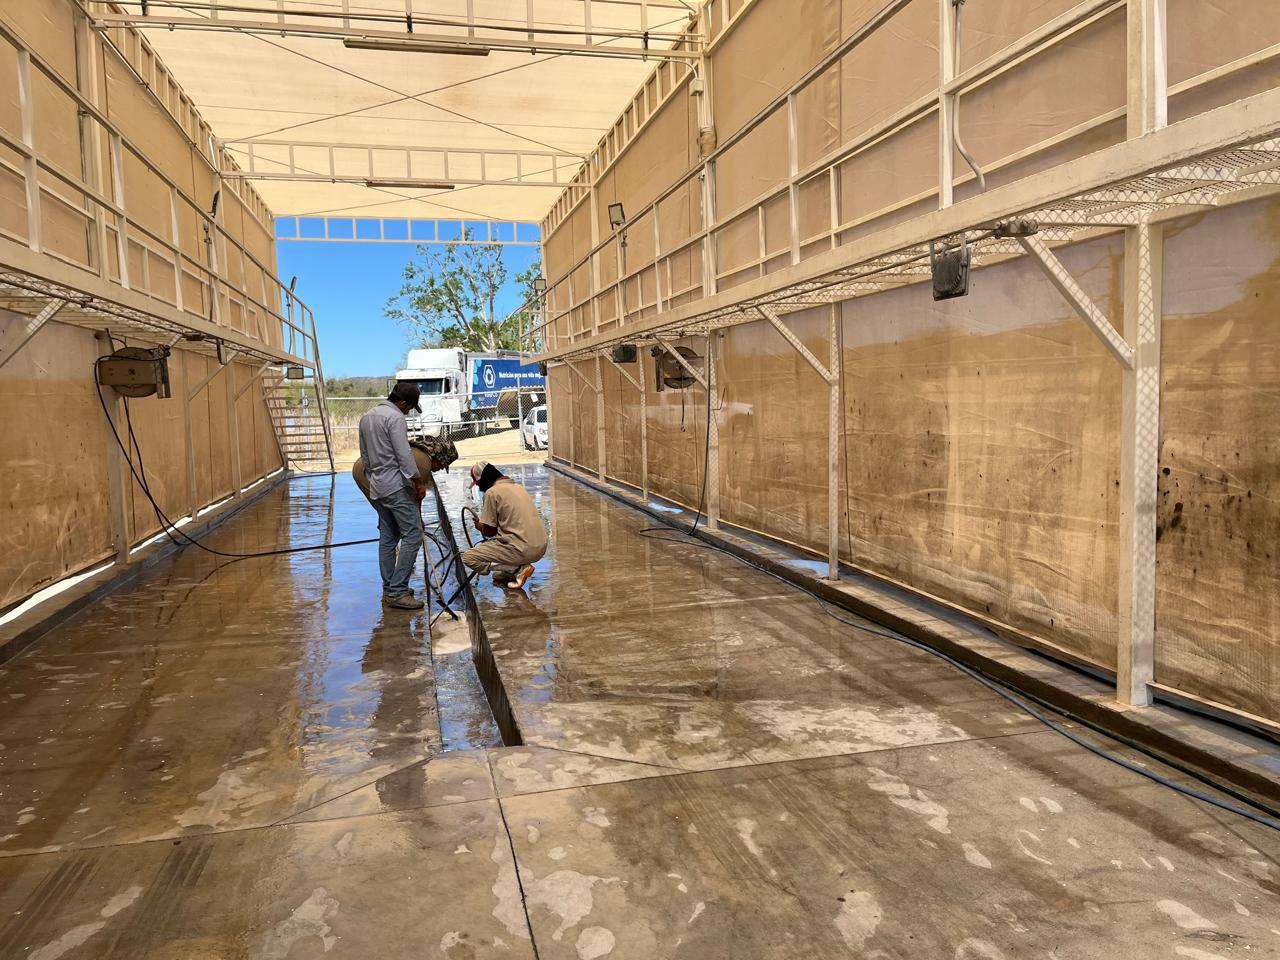

{'id': 'chatcmpl-9uEXgYaMRW4CKoySKCW5ZxxnMm9Eq', 'object': 'chat.completion', 'created': 1723189296, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.7,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.6,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.0,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.3,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    }\n]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 164, 'total_tokens': 25757}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-6


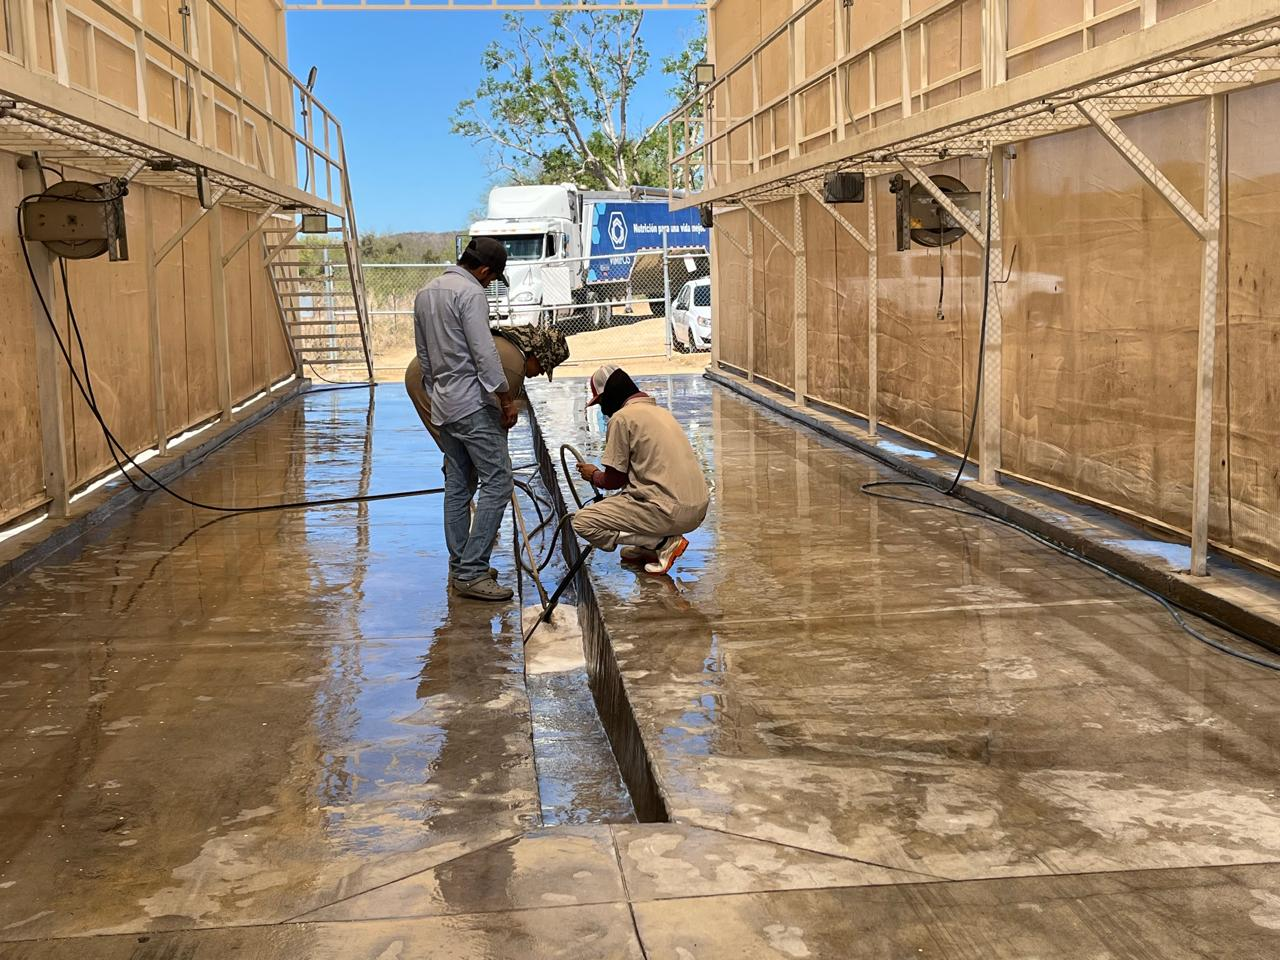

{'id': 'chatcmpl-9uEXmMtGw4dW9NzFi3obzMObOeCCd', 'object': 'chat.completion', 'created': 1723189302, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.8,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.6,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.6,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.7,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    }\n]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 25593, 'completion_tokens': 164, 'total_tokens': 25757}, 'system_fingerprint': 'fp_507c9469a1'}


Image ID: image-7


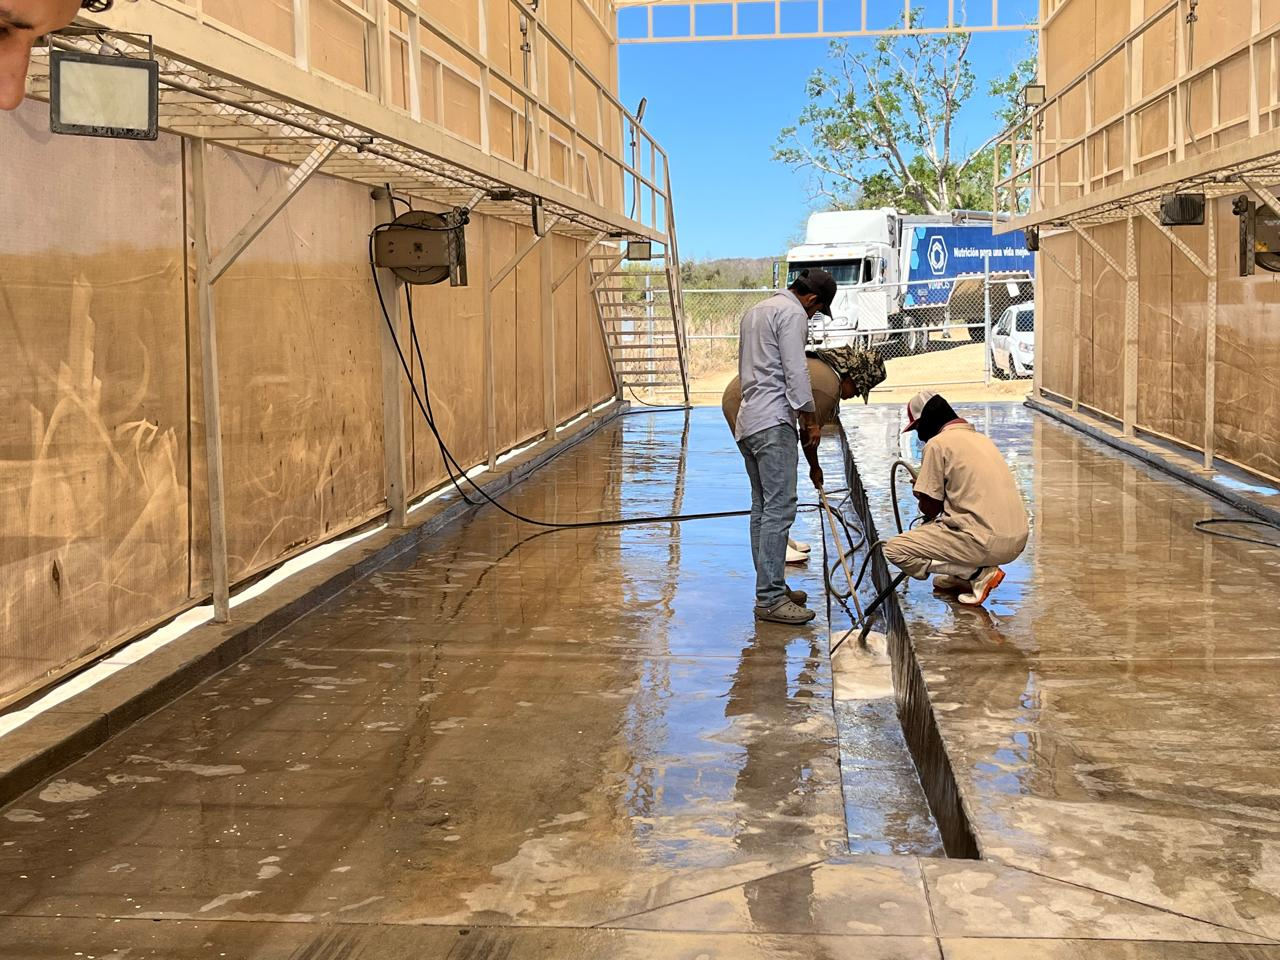

{'id': 'chatcmpl-9uEXtg4V4XUQfsH86YBYTWSsGNODo', 'object': 'chat.completion', 'created': 1723189309, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.0,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.8,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.5,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.0,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.0,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.6,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    }\n]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens'

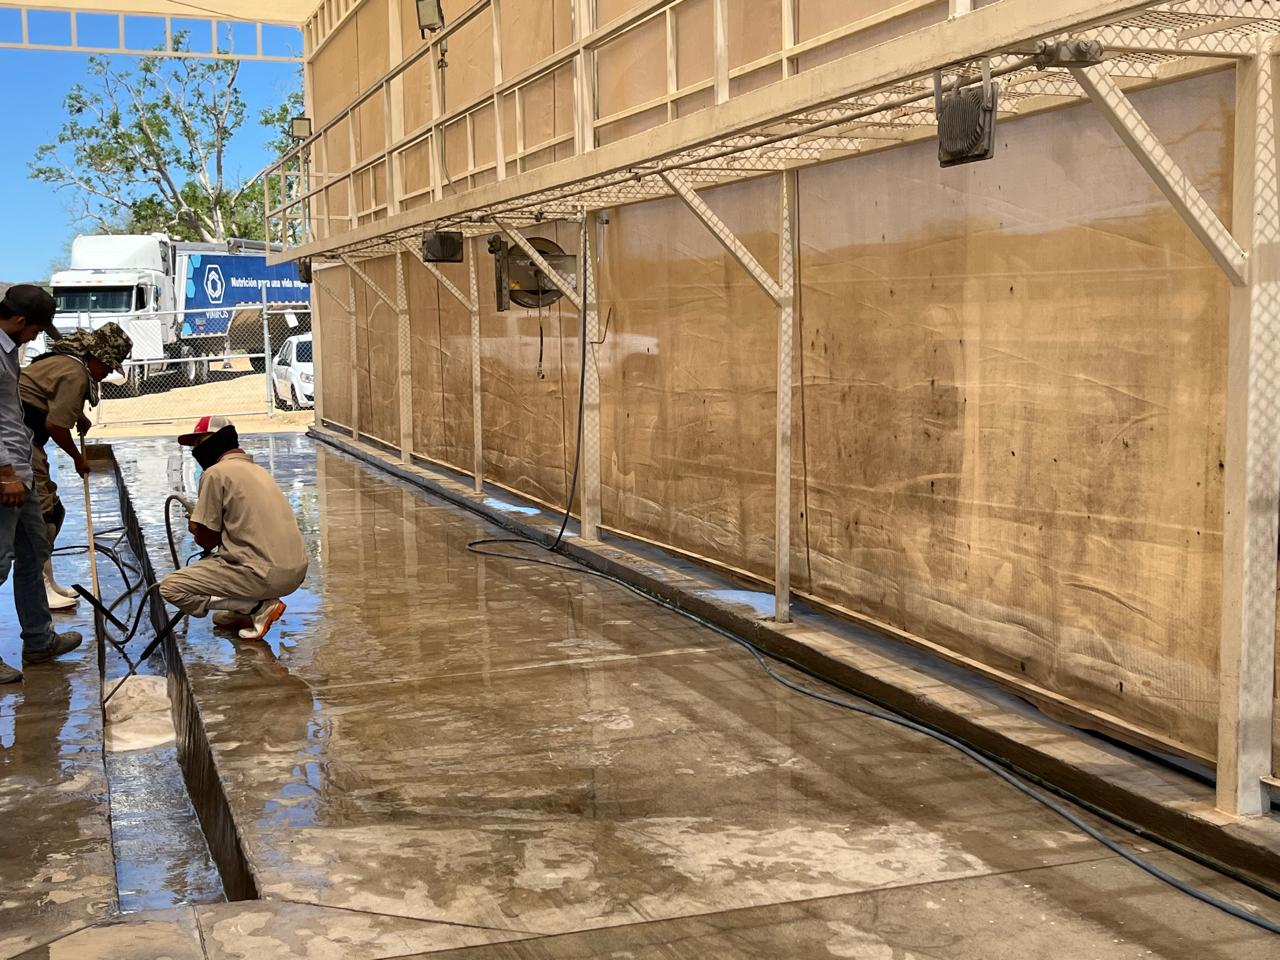

{'id': 'chatcmpl-9uEXybQyJYYNYHaYwtktchWW8FwUf', 'object': 'chat.completion', 'created': 1723189314, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[\n    {\n        "White Rubber Boots": 0.8,\n        "Brown Pants": 0.9,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.0,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.7,\n        "Brown Pants": 0.6,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.0,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.0,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.5,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    }\n]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens'

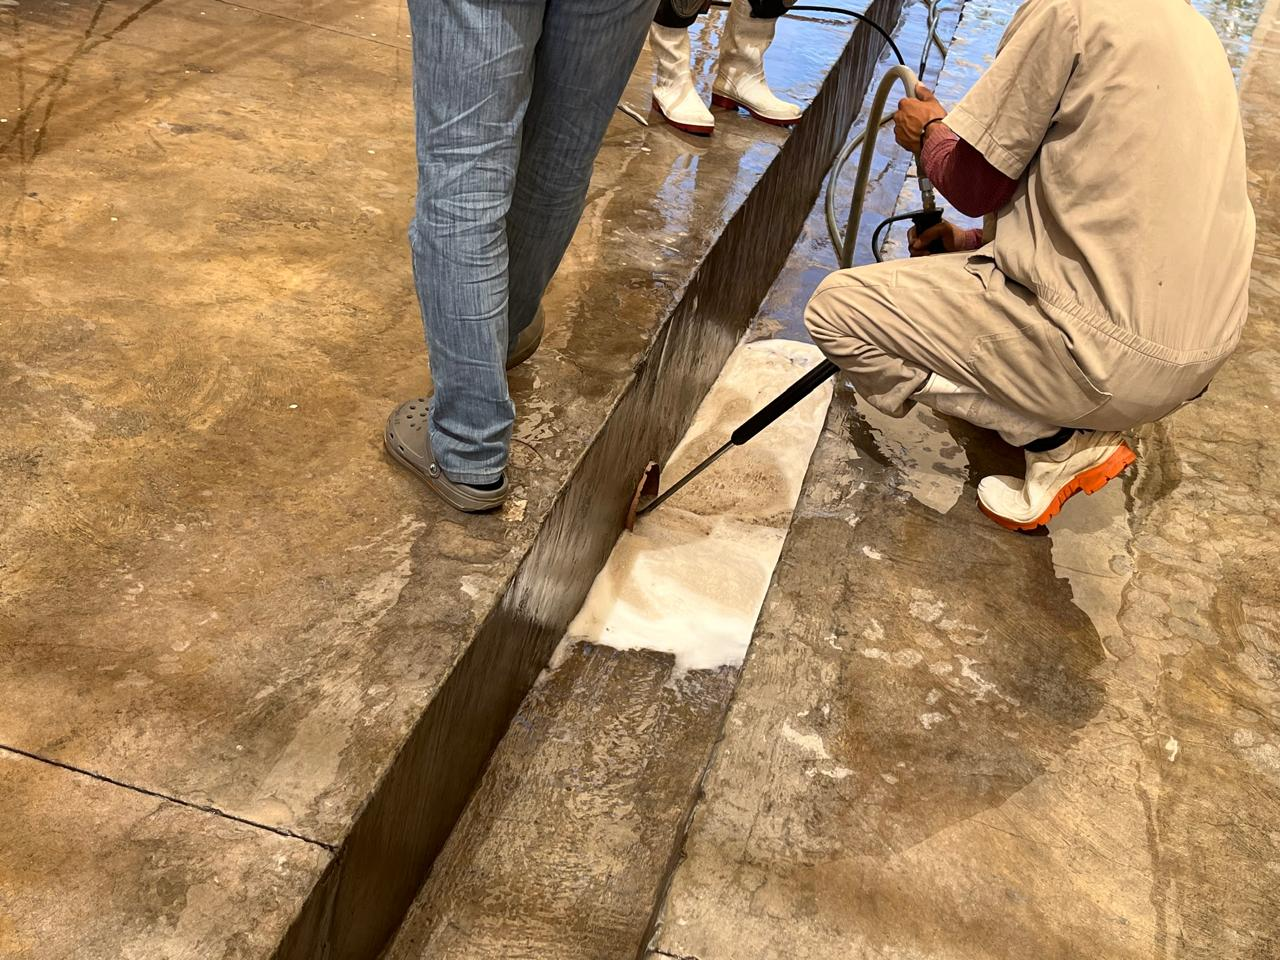

{'id': 'chatcmpl-9uEY6g1U5Rgd38mUnA7QfeY2w7u59', 'object': 'chat.completion', 'created': 1723189322, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```python\n[\n    {\n        "White Rubber Boots": 0.9,\n        "Brown Pants": 0.1,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.0,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.85,\n        "Brown Pants": 0.0,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.0,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    },\n    {\n        "White Rubber Boots": 0.0,\n        "Brown Pants": 0.9,\n        "Knee Protector": 0.0,\n        "Brown Long Sleeves Shirt": 0.0,\n        "Glasses": 0.0,\n        "Gloves": 0.0,\n        "Gas Mask": 0.0\n    }\n]\n```', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens

In [9]:
import os
import json
import base64
import requests
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

# OpenAI API Key
api_key = os.getenv("OPENAI_API_KEY")

# Path to the JSONL file
input_file_path = "test_images.jsonl"
output_file_path = "responses.jsonl"

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Read the JSONL file
with open(input_file_path, "r") as f:
    lines = f.readlines()

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

responses = []

# Process each image
for line in lines:
    entry = json.loads(line)
    encoded_image = entry["encoded_image"]
    custom_id = entry["custom_id"]

    payload = {
        "model": "gpt-4o-mini",
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Your goal is to for each image input you need to identify for each person in image are they wearing (White Rubber Boots, Brown Pants, Knee Protector, Brown Long Sleeves Shirt, Glasses, Gloves, Gas Mask) these are the classes. For each person you will only return output in form of python dictionary with each class as key and detected probability of that class as value do not return any other text or information.",
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"},
                    },
                ],
            }
        ],
        "max_tokens": 300,
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response_data = response.json()

    # Save the response with the associated image ID
    responses.append({
        "image_id": custom_id,
        "response": response_data
    })

    print(f"Image ID: {custom_id}")
    print(response_data)
    print("\n" + "="*50 + "\n")

# Save all responses to a file
with open(output_file_path, "w") as f:
    for response in responses:
        f.write(json.dumps(response) + "\n")

# Display each image and its corresponding response
for response in responses:
    image_id = response["image_id"]
    response_data = response["response"]

    # Find the corresponding image entry
    for line in lines:
        entry = json.loads(line)
        if entry["custom_id"] == image_id:
            encoded_image = entry["encoded_image"]
            break

    print(f"Image ID: {image_id}")
    display(Image(data=base64.b64decode(encoded_image)))
    print(response_data)
    print("\n" + "="*50 + "\n")

In [13]:
import json
import cv2
import numpy as np
from IPython.display import display, Image
from PIL import Image as PILImage
from io import BytesIO

def display_predictions_from_jsonl(jsonl_file_path):
    # Open the JSONL file
    with open(jsonl_file_path, 'r') as f:
        # Read each line (each line is a JSON object)
        for line in f:
            # Parse the JSON object from the line
            data = json.loads(line)

            # Extract image_id, image_path, and detections
            image_id = data.get('image_id')
            image_path = data.get('encoded_image')  # Now this is a file path
            detections = data.get('detections')

            # Only proceed if detections list is not empty
            if detections:  # This will check if the detections list is not empty or None
                # Load the image from the file path
                img = cv2.imread(image_path)

                # Convert the image from OpenCV (BGR) to RGB format
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Convert the image to PIL format for display in Jupyter Notebook
                pil_img = PILImage.fromarray(img_rgb)
                buffer = BytesIO()
                pil_img.save(buffer, format="JPEG")
                display_image = Image(buffer.getvalue())
                print(detections)
                        

                # Display the image in the notebook
                display(display_image)




Worker 1 is wearing white_rubber_boots. However, they are not wearing brown_pants, brown_long_sleeves_shirt, glasses, crocs. Detection failed due to occlusion for knee_protector, gloves, gas_mask.
Worker 2 is wearing crocs. However, they are not wearing white_rubber_boots, brown_pants, knee_protector, brown_long_sleeves_shirt, glasses, gloves, gas_mask.



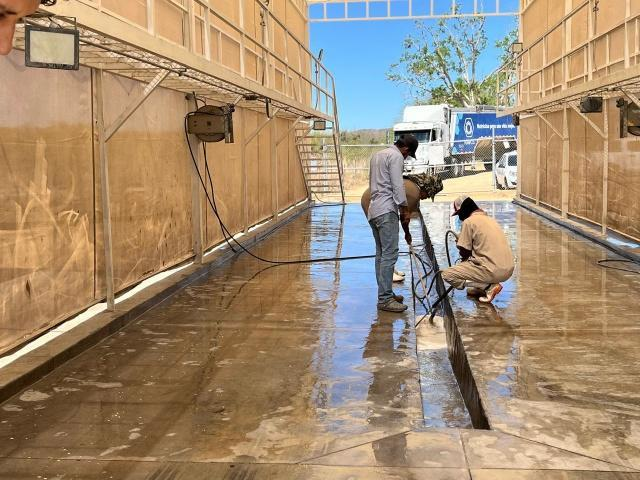

Worker 1 is wearing brown_long_sleeves_shirt. However, they are not wearing white_rubber_boots, brown_pants, glasses, gas_mask, crocs. Detection failed due to occlusion for knee_protector, gloves.
Worker 2 is wearing brown_pants. However, they are not wearing white_rubber_boots, brown_long_sleeves_shirt, glasses, gas_mask, crocs. Detection failed due to occlusion for knee_protector, gloves.



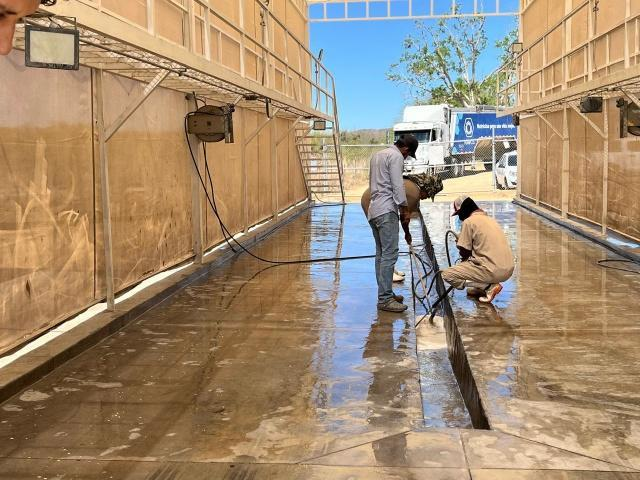

In [16]:
display_predictions_from_jsonl("rtsp_captures_result.jsonl")

Image ID: frame-2
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


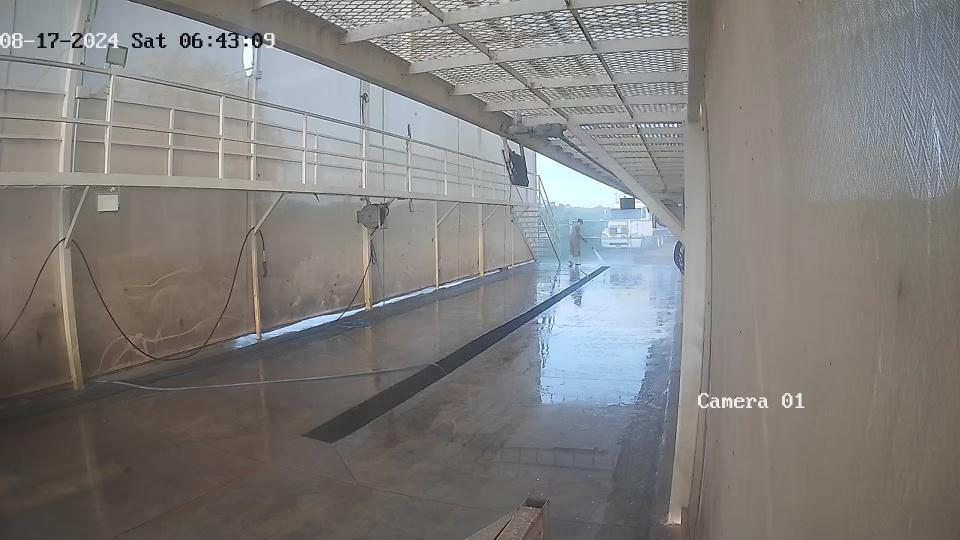

Image ID: frame-6
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': 0.0, 'crocs': 0.0}]


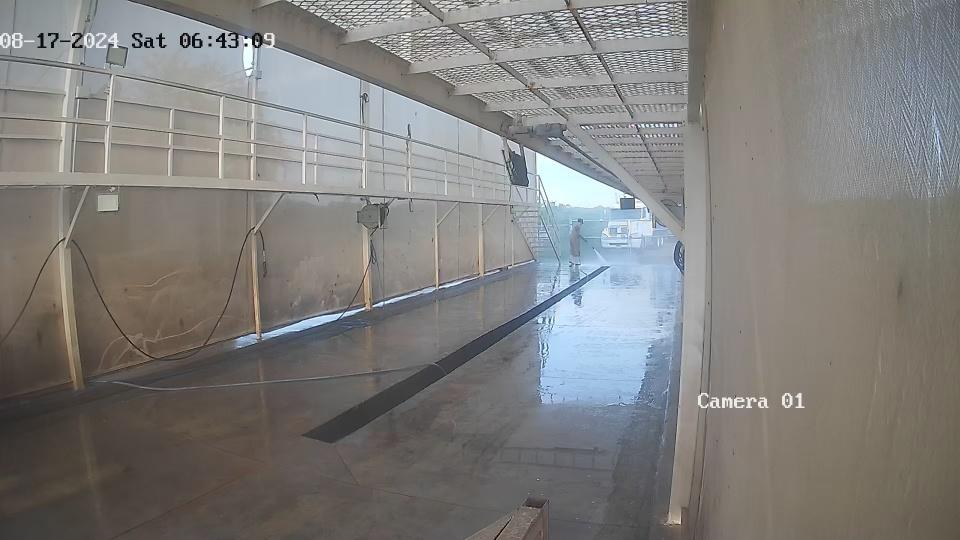

Image ID: frame-10
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


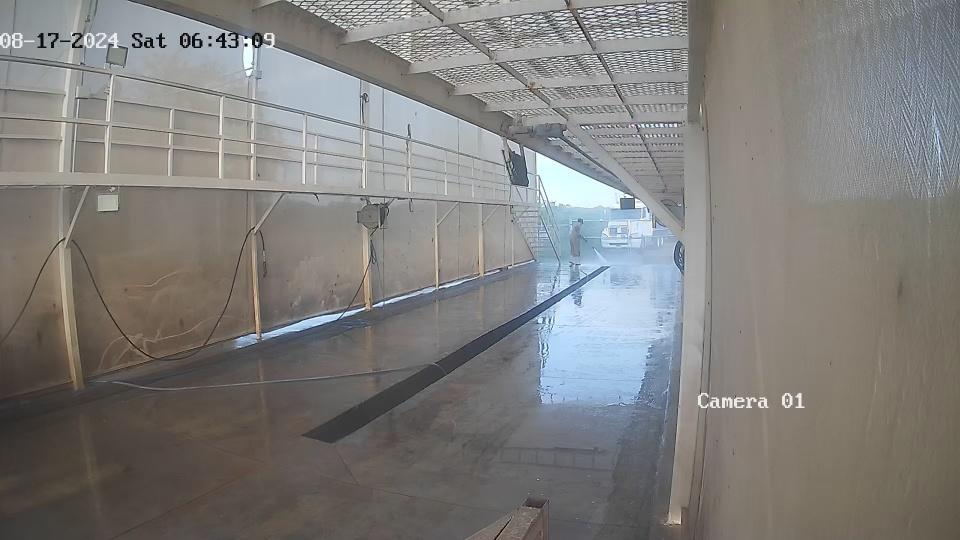

Image ID: frame-66
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.8, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.6, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


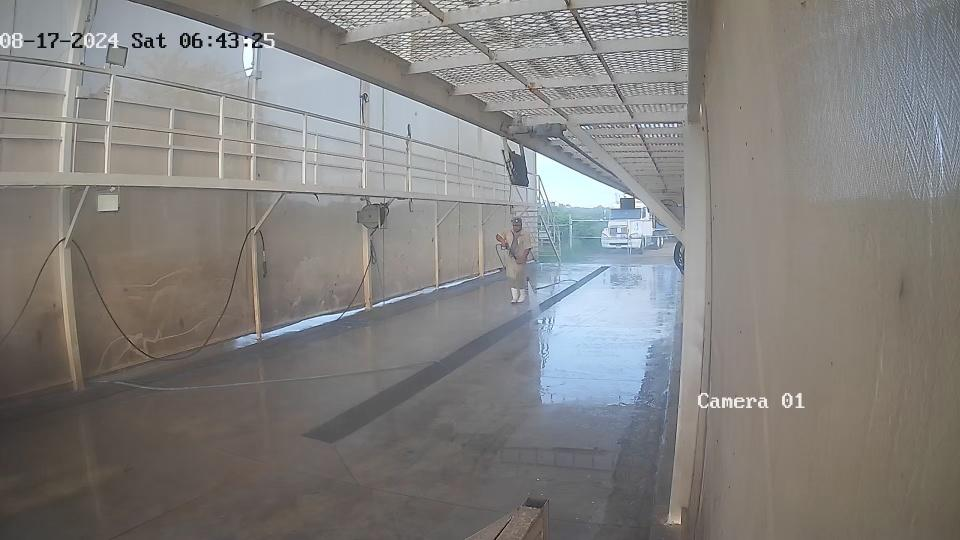

Image ID: frame-67
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.8, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.6, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


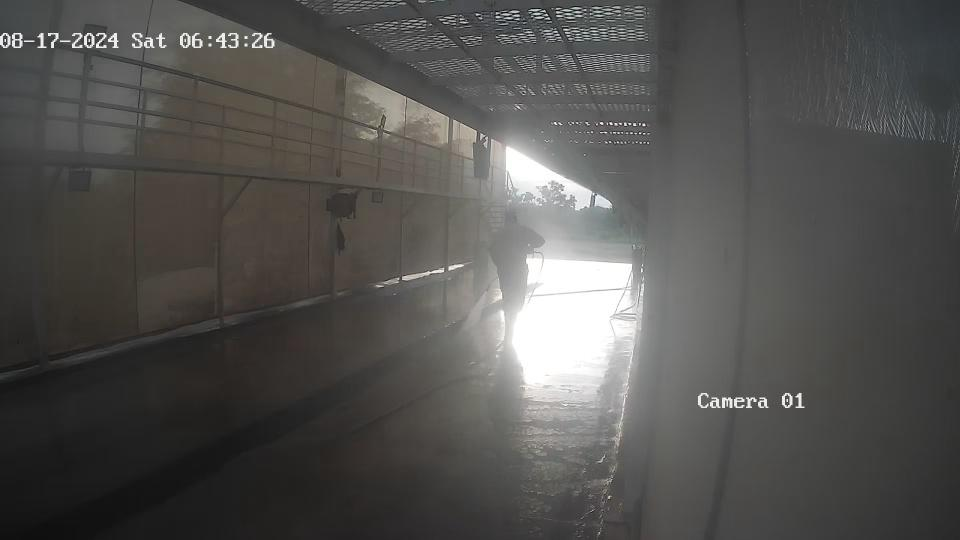

Image ID: frame-70
Detections: [{'white_rubber_boots': 1.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 1.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


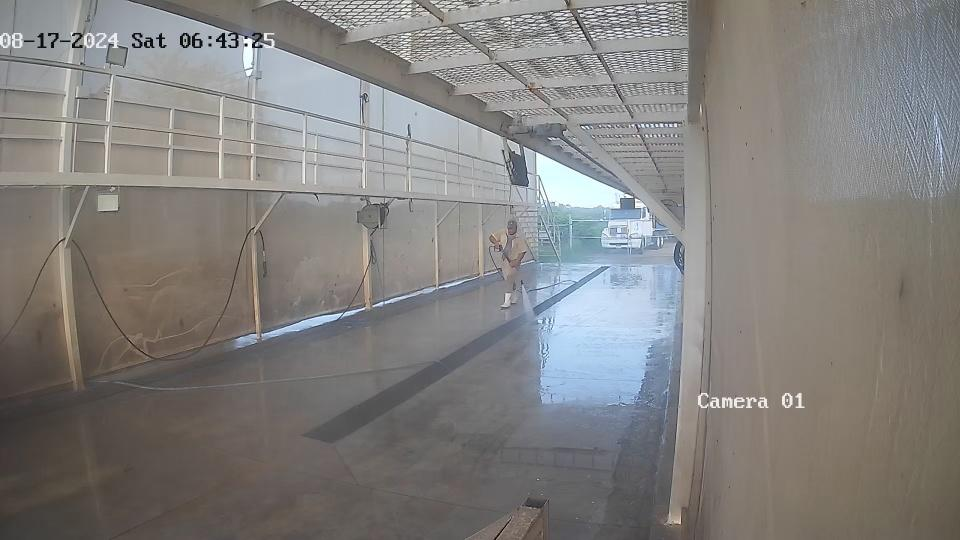

Image ID: frame-71
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


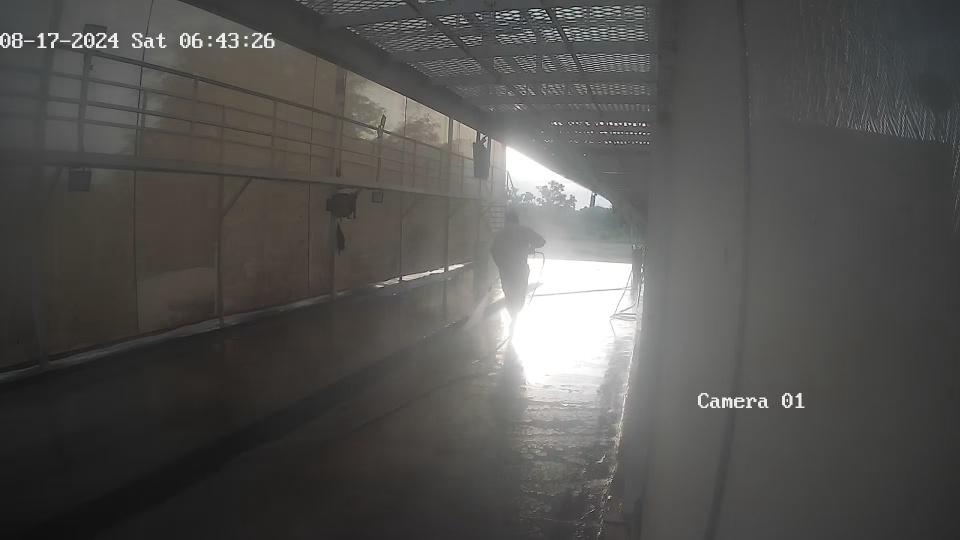

Image ID: frame-74
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.8, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


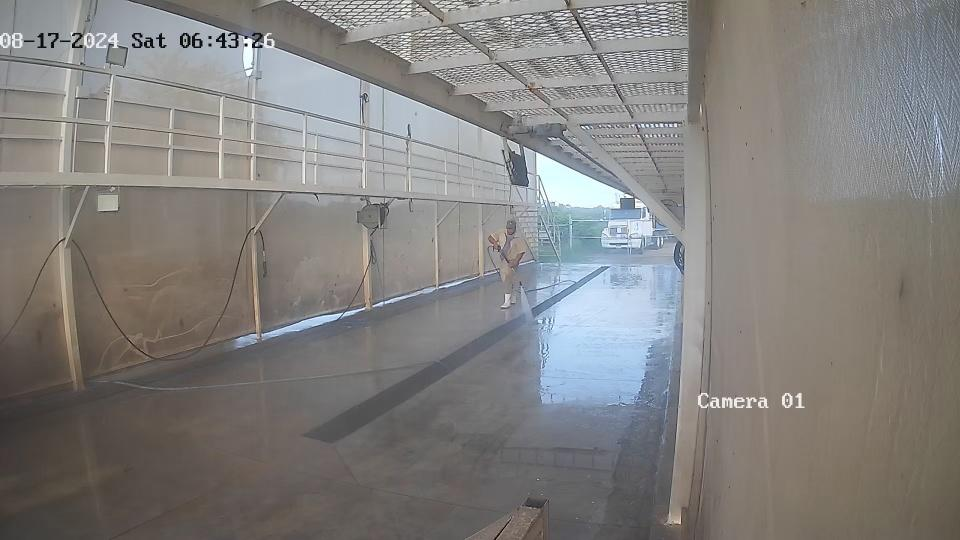

Image ID: frame-75
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


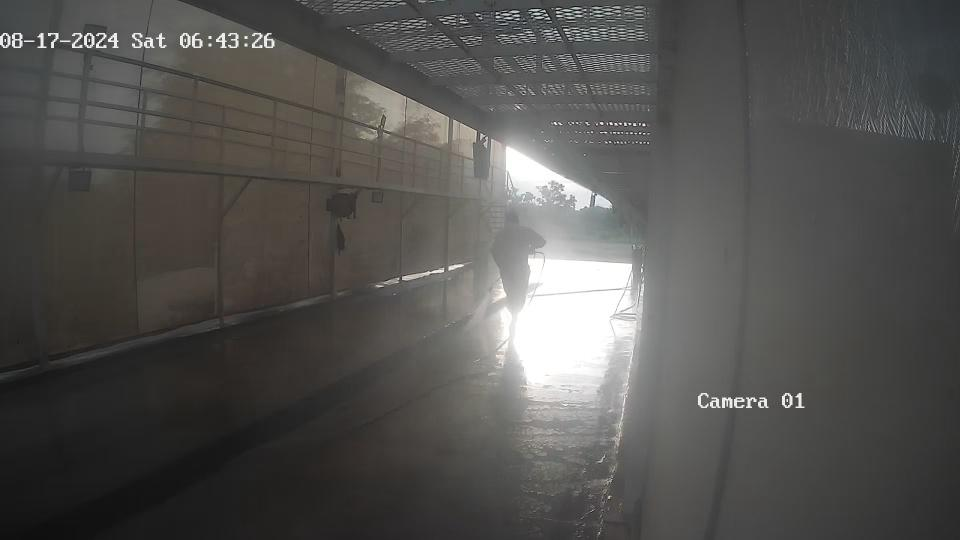

Image ID: frame-78
Detections: [{'white_rubber_boots': 0.95, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.9, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': 0.0, 'crocs': 0.0}]


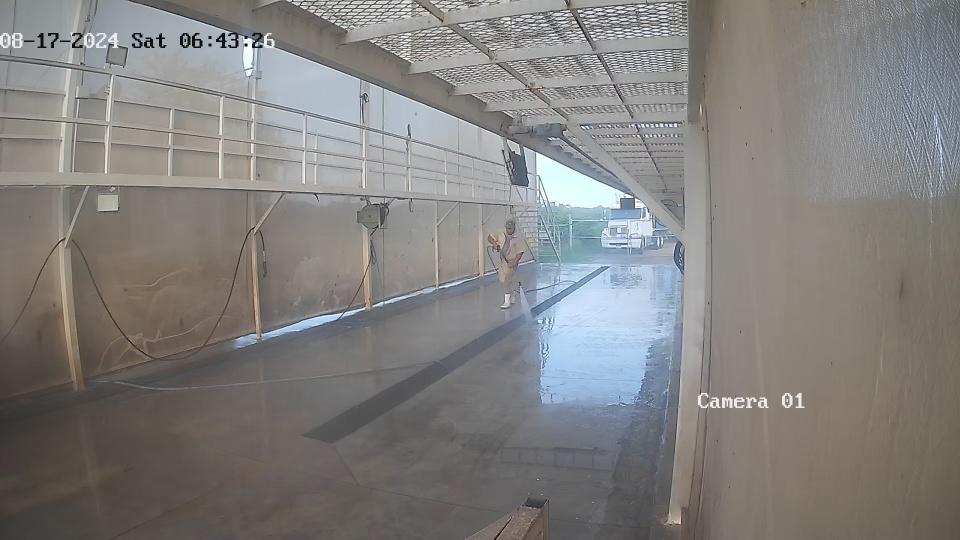

Image ID: frame-79
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


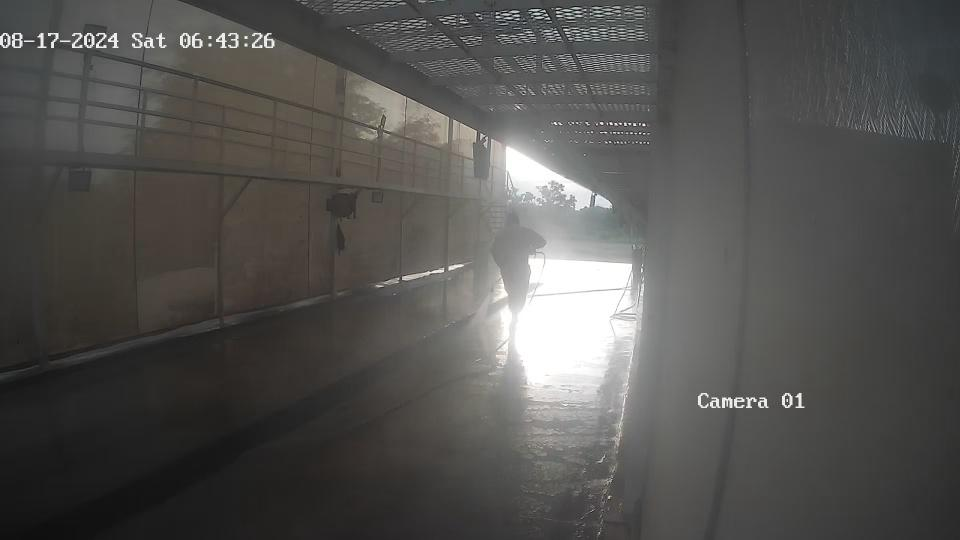

Image ID: frame-83
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


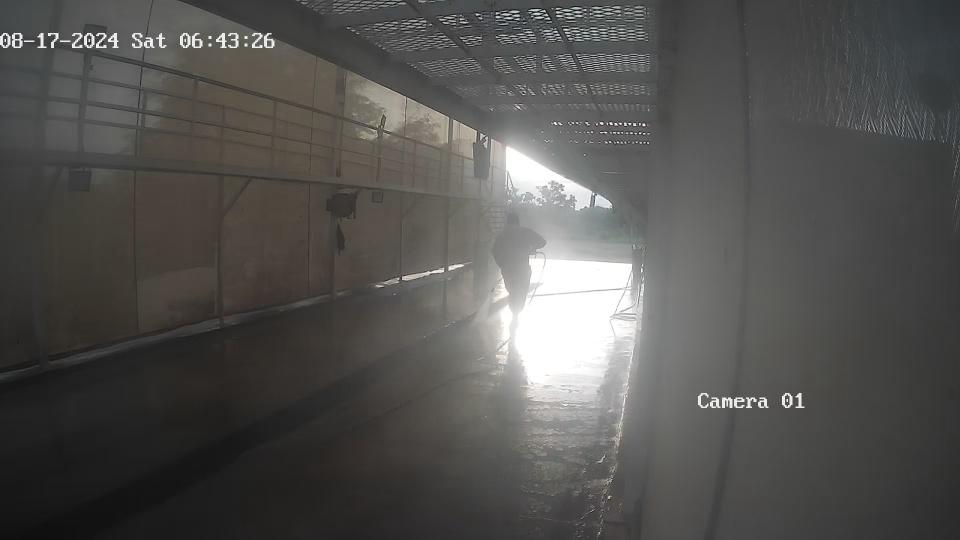

Image ID: frame-82
Detections: [{'white_rubber_boots': 1.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


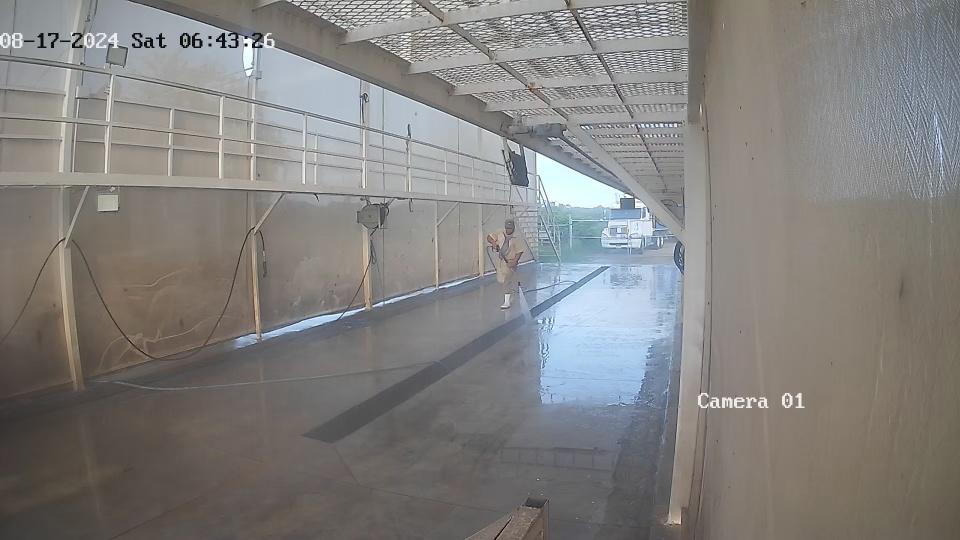

Image ID: frame-87
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


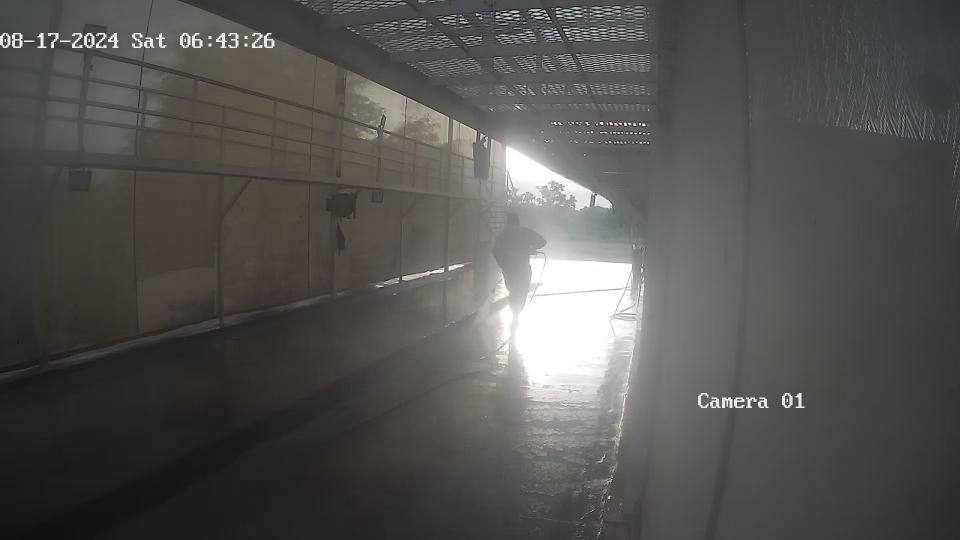

Image ID: frame-86
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.8, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


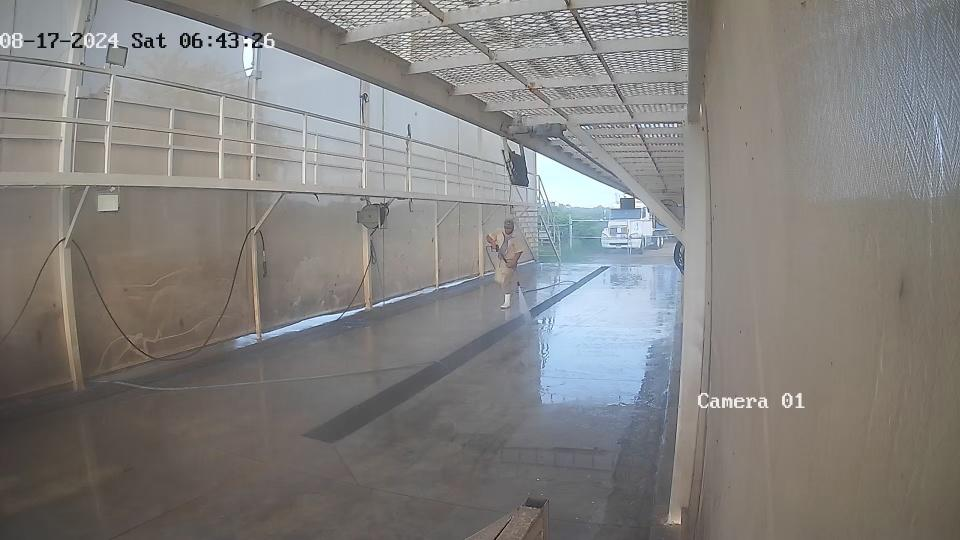

Image ID: frame-90
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.8, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


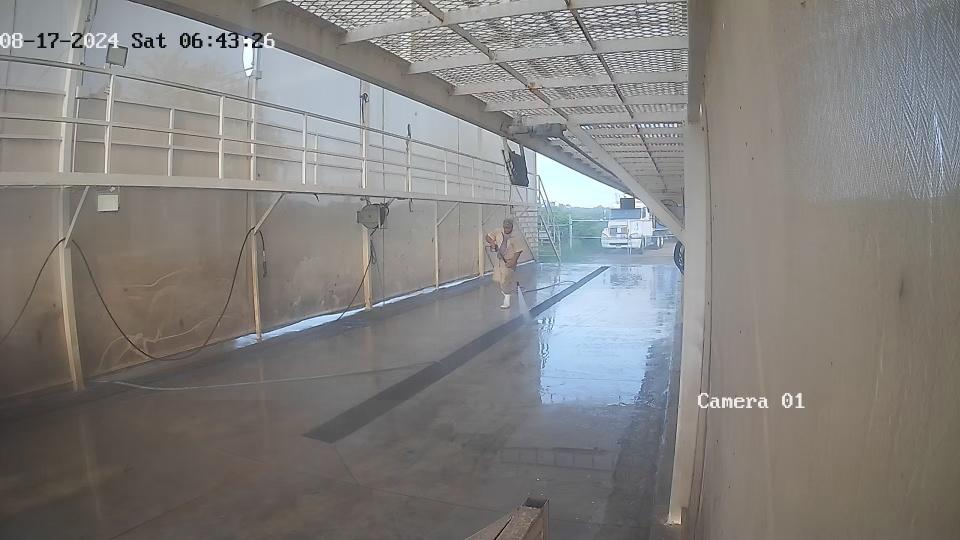

Image ID: frame-91
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


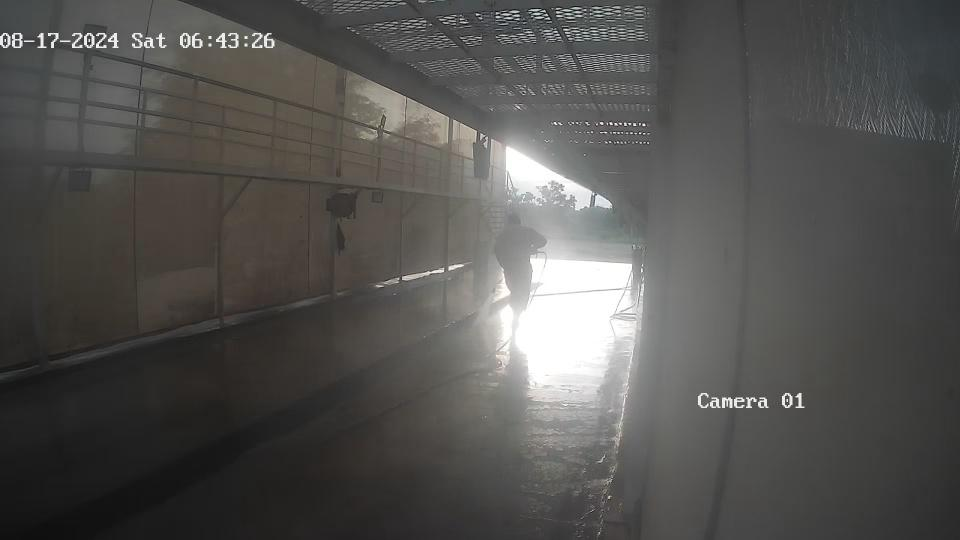

Image ID: frame-95
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': 0.0, 'crocs': 0.0}]


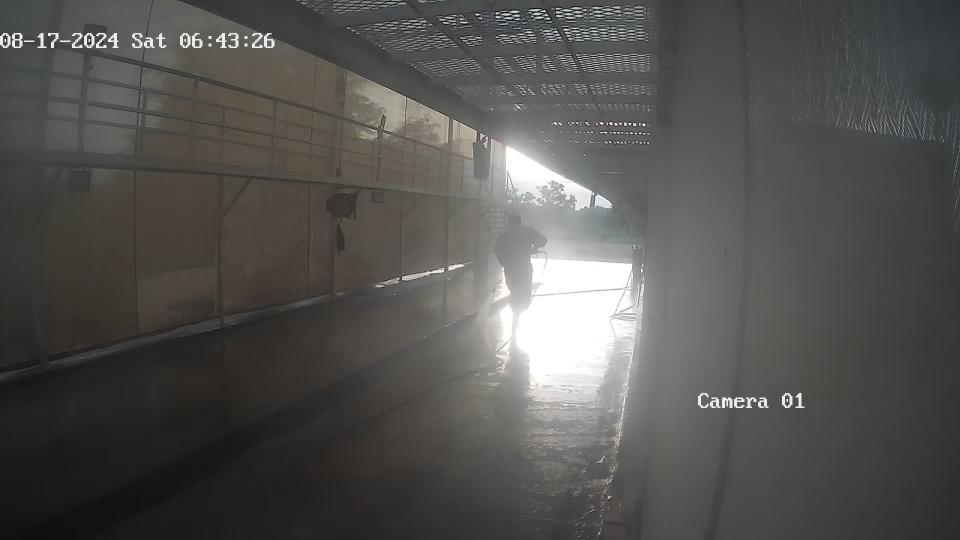

Image ID: frame-99
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': 0.0, 'crocs': 0.0}]


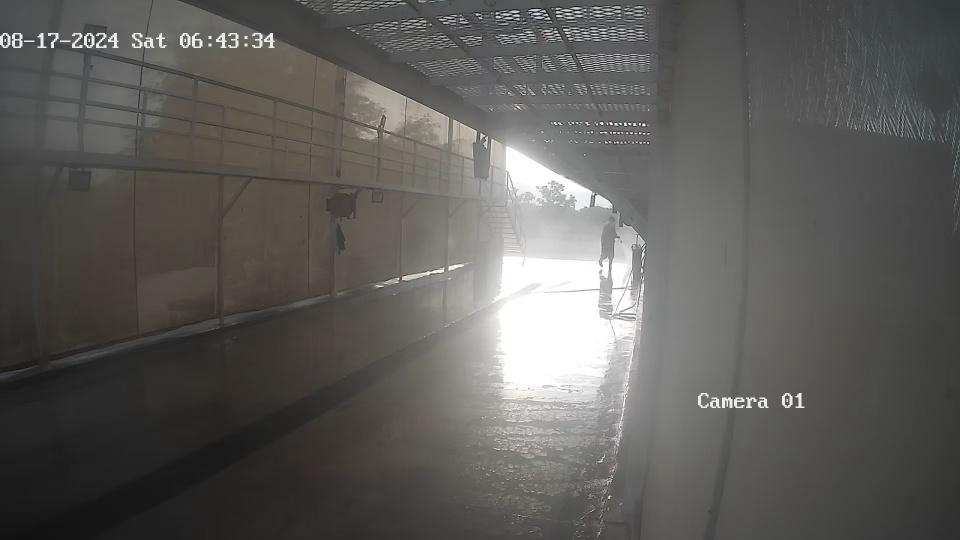

Image ID: frame-103
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


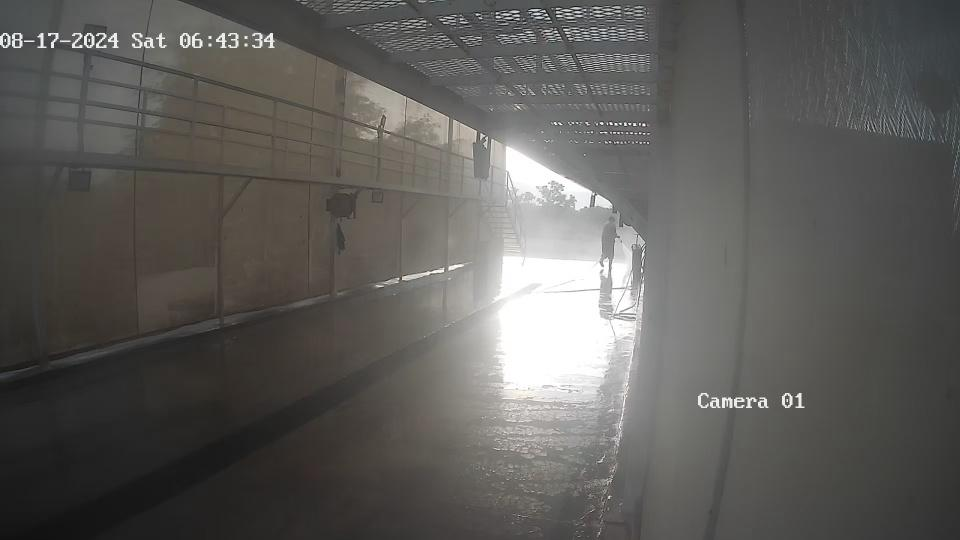

Image ID: frame-107
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


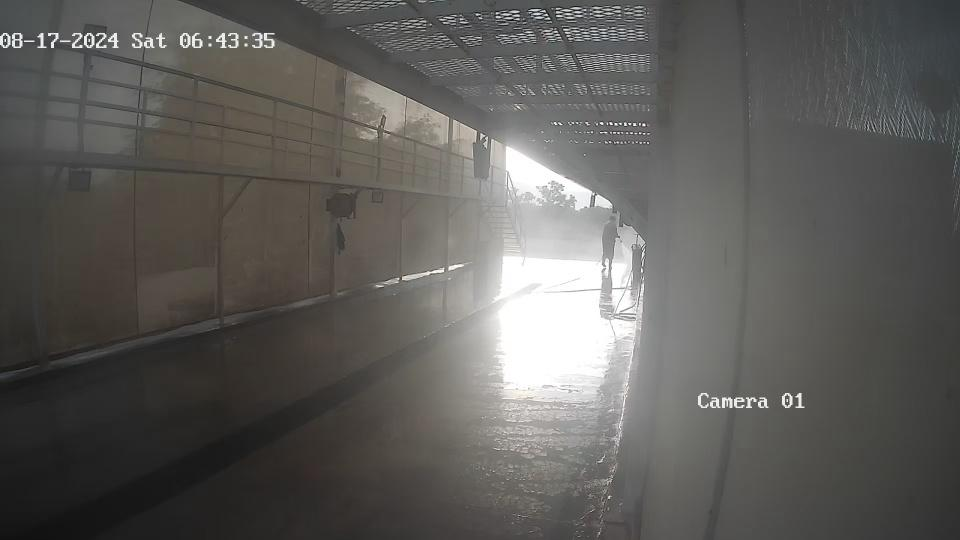

Image ID: frame-111
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


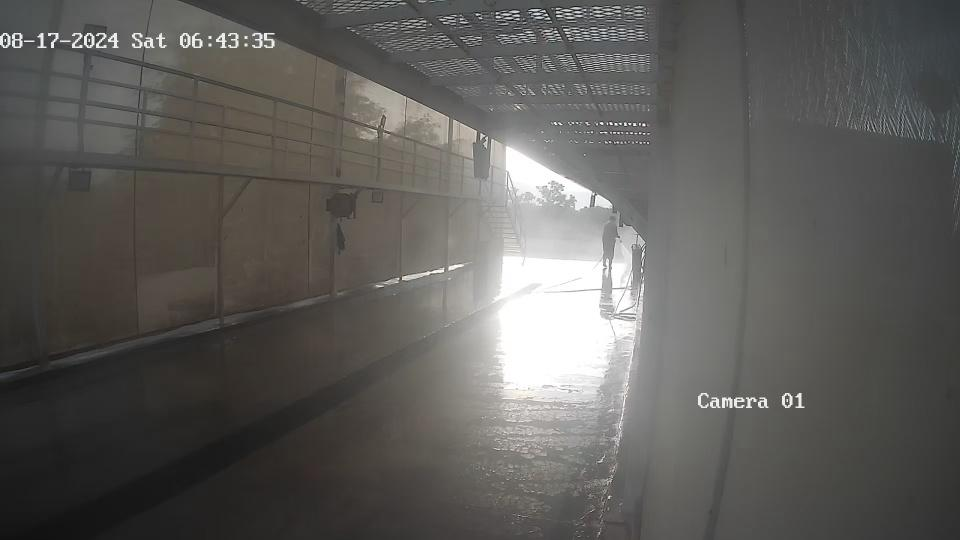

Image ID: frame-119
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


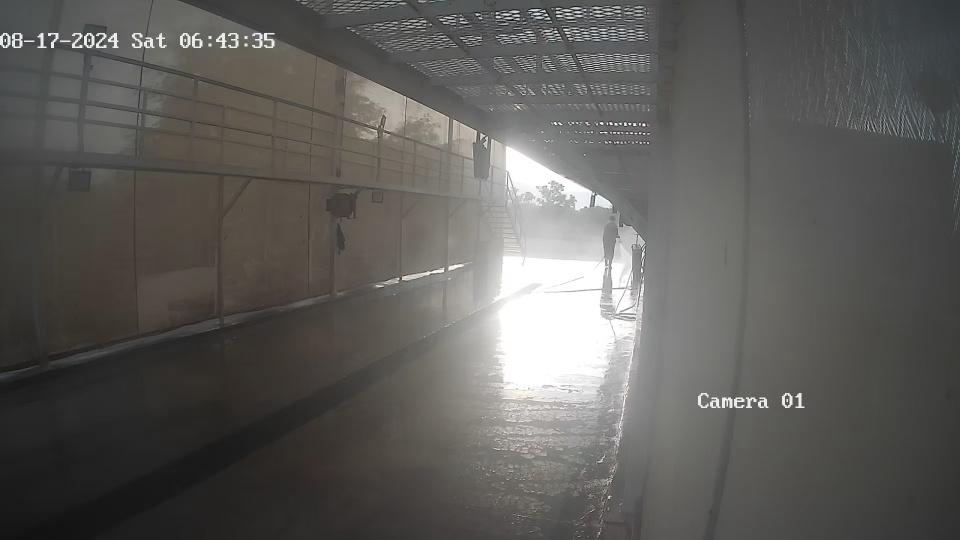

Image ID: frame-135
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}, {'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': 0.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': 0.0, 'gas_mask': 0.0, 'crocs': 0.0}]


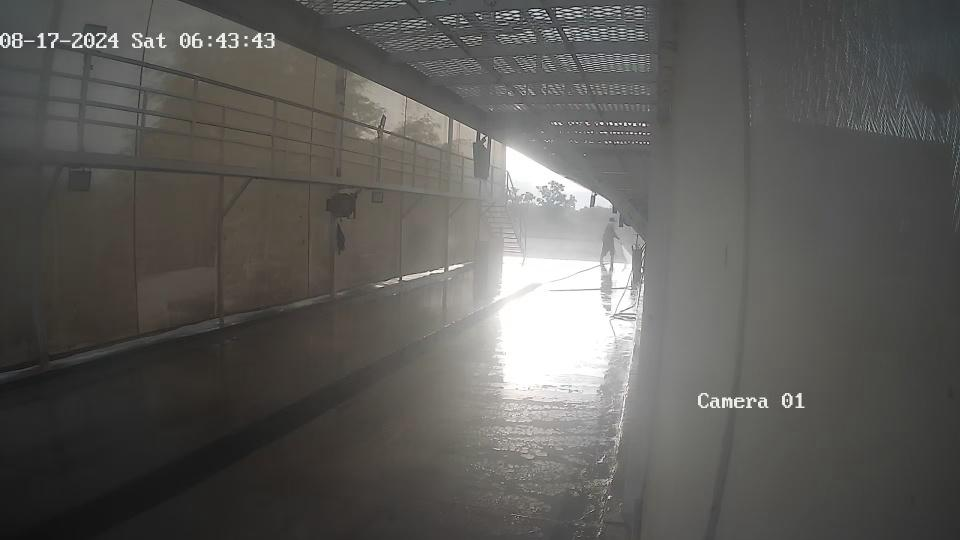

Image ID: frame-139
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


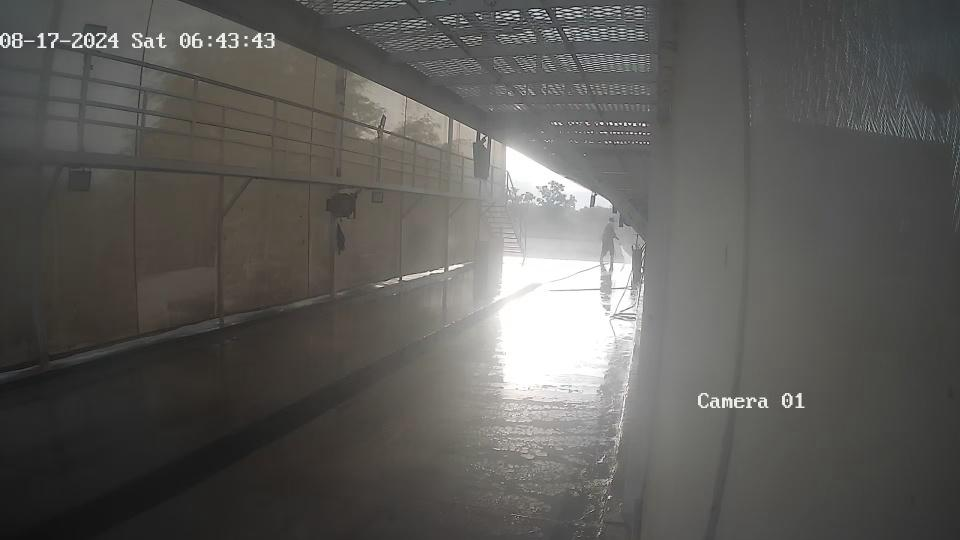

Image ID: frame-143
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': 0.0, 'crocs': 0.0}]


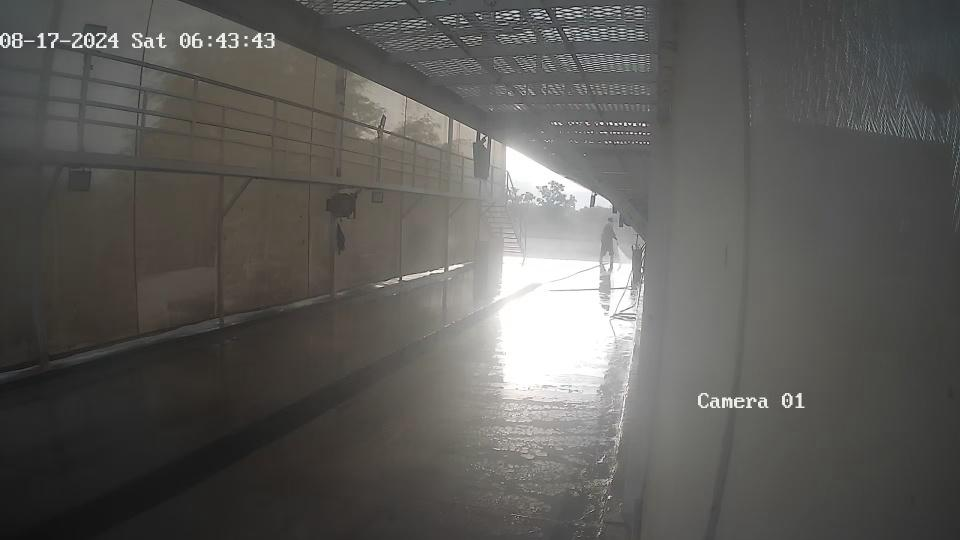

Image ID: frame-151
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': 0.0, 'crocs': 0.0}, {'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': 0.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': 0.0, 'gas_mask': 0.0, 'crocs': 0.0}]


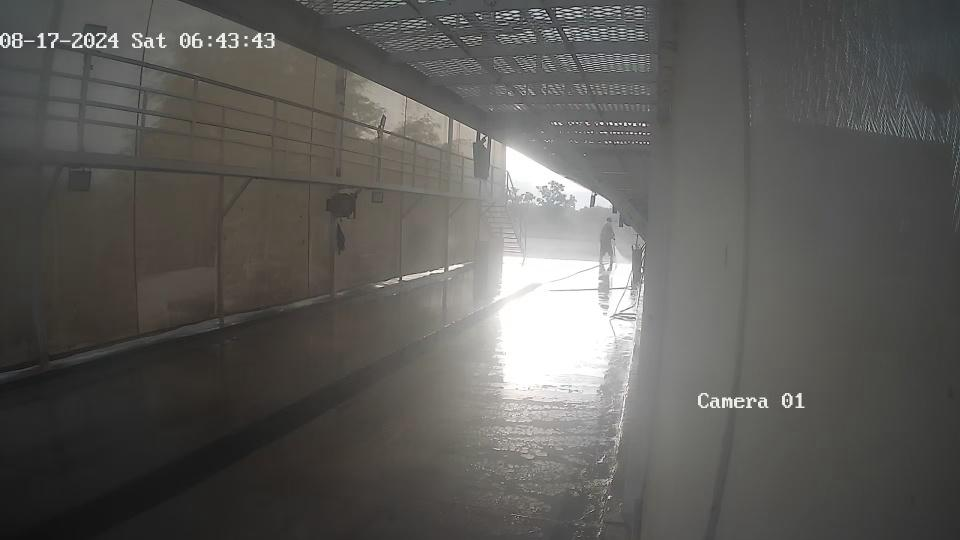

Image ID: frame-155
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


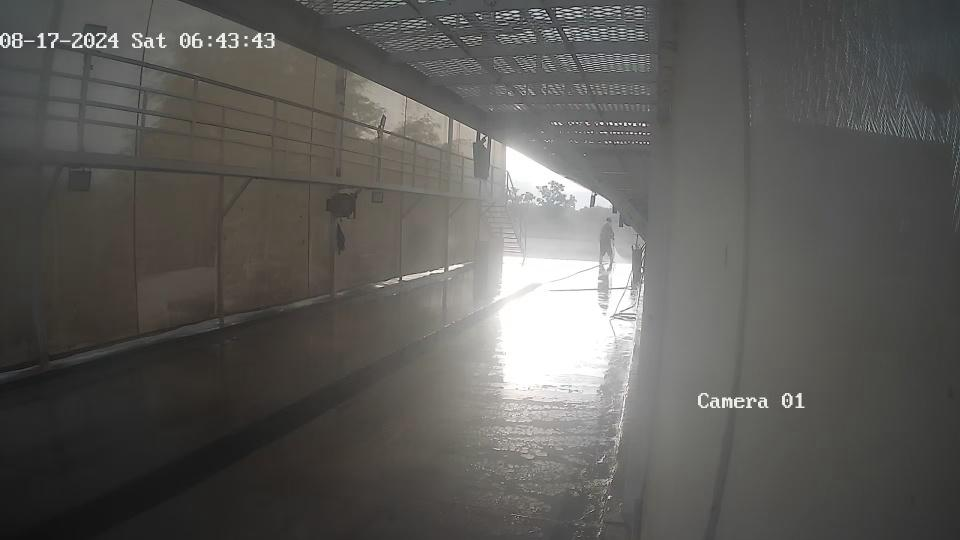

Image ID: frame-17
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}, {'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': 0.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': 0.0, 'gas_mask': 0.0, 'crocs': 0.0}]


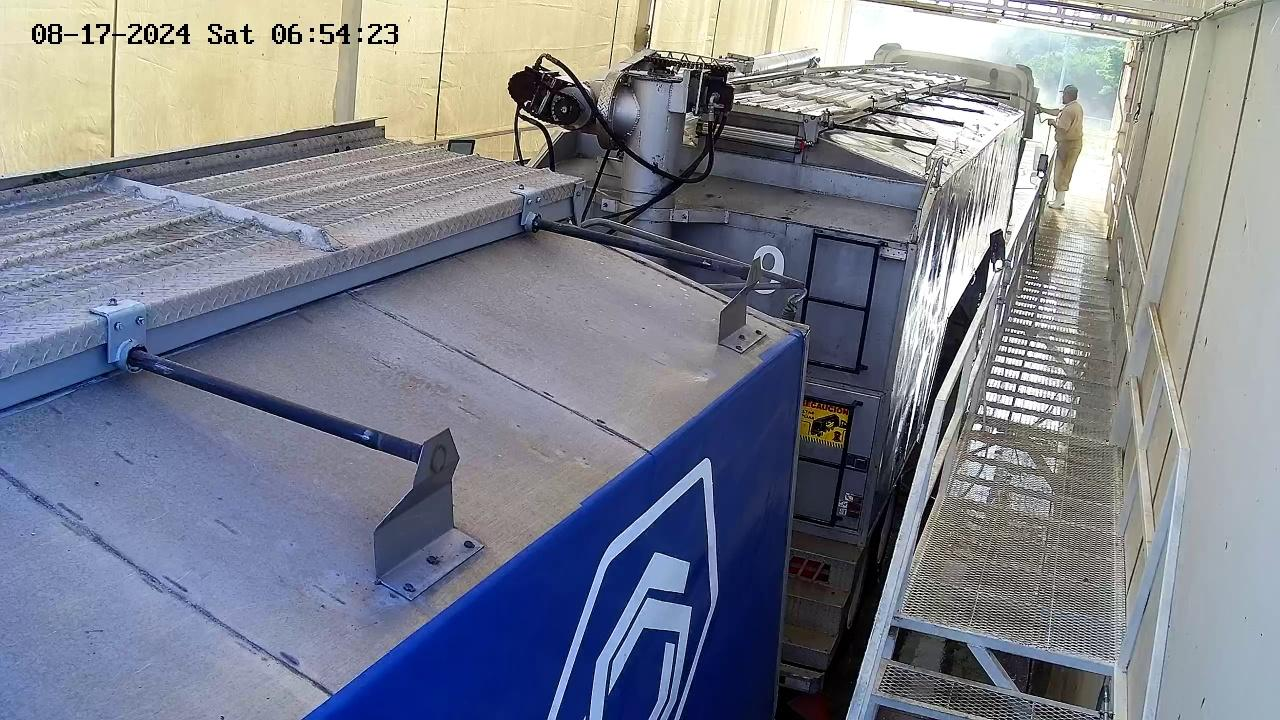

Image ID: frame-21
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 1.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 1.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


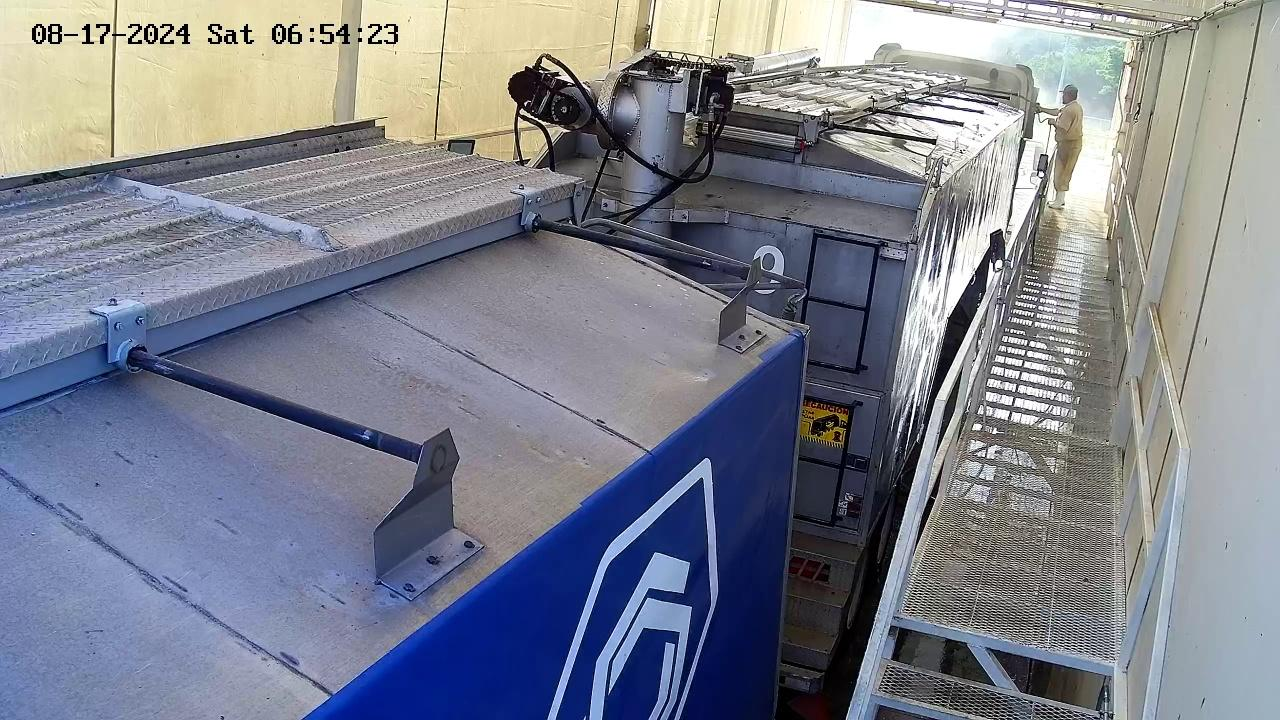

Image ID: frame-25
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.8, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.6, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


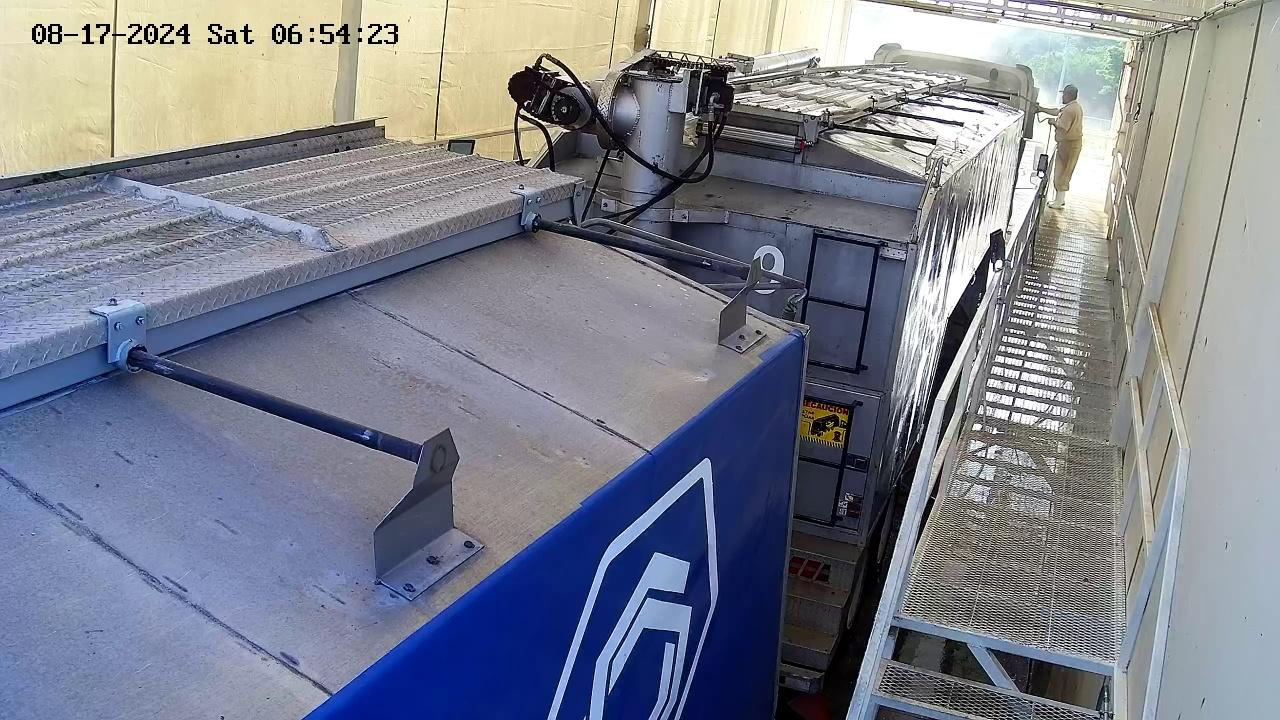

Image ID: frame-29
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 1.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 1.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


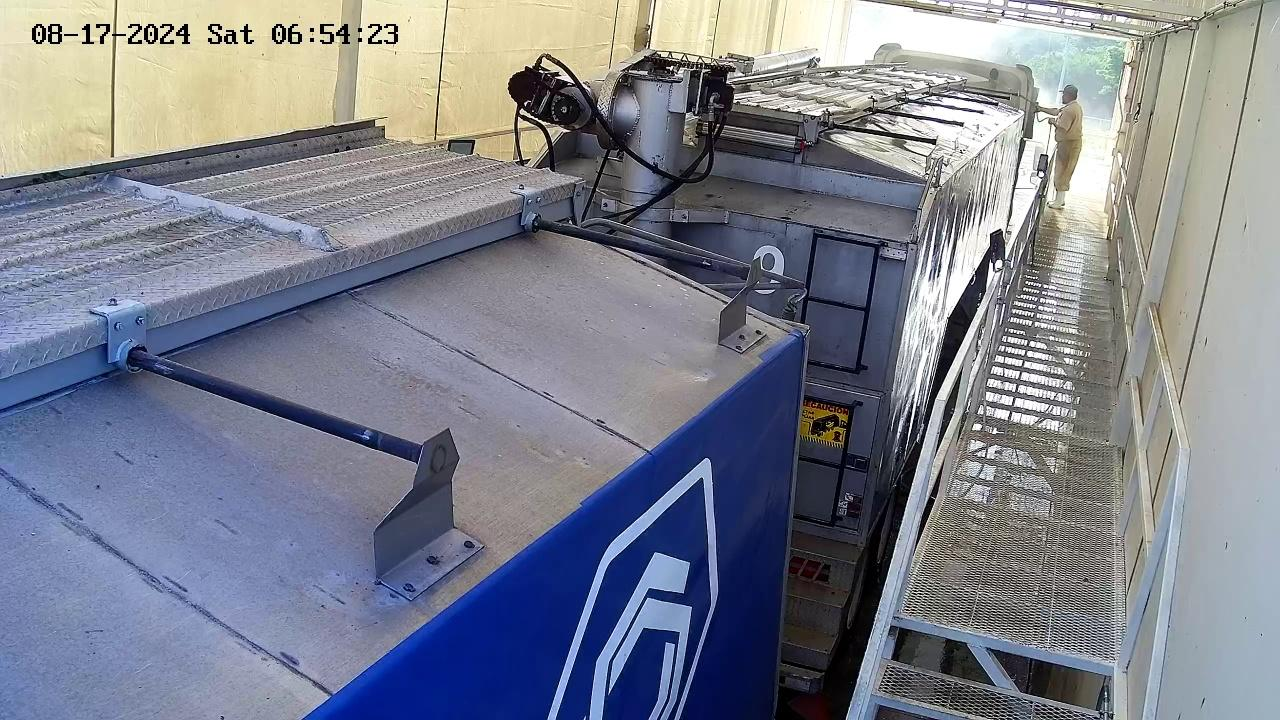

Image ID: frame-3
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


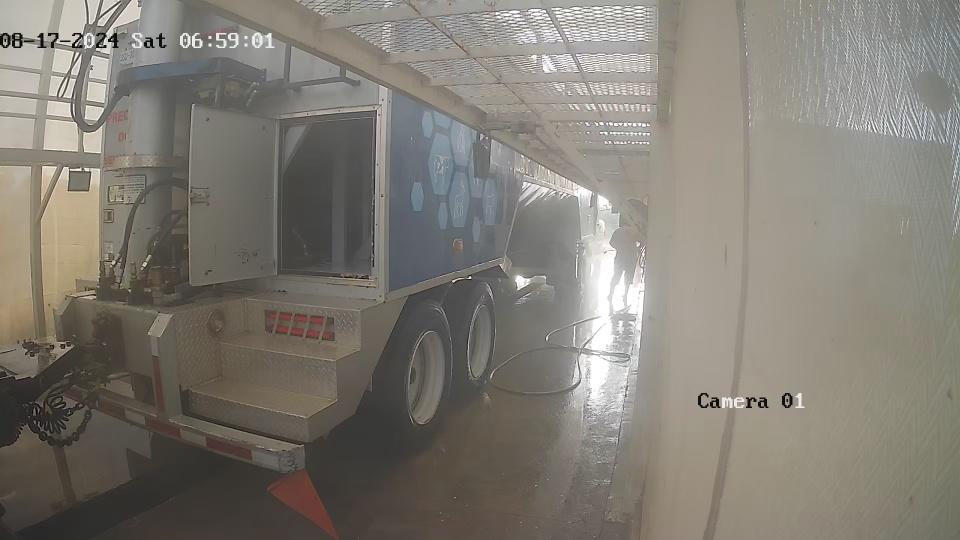

Image ID: frame-15
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


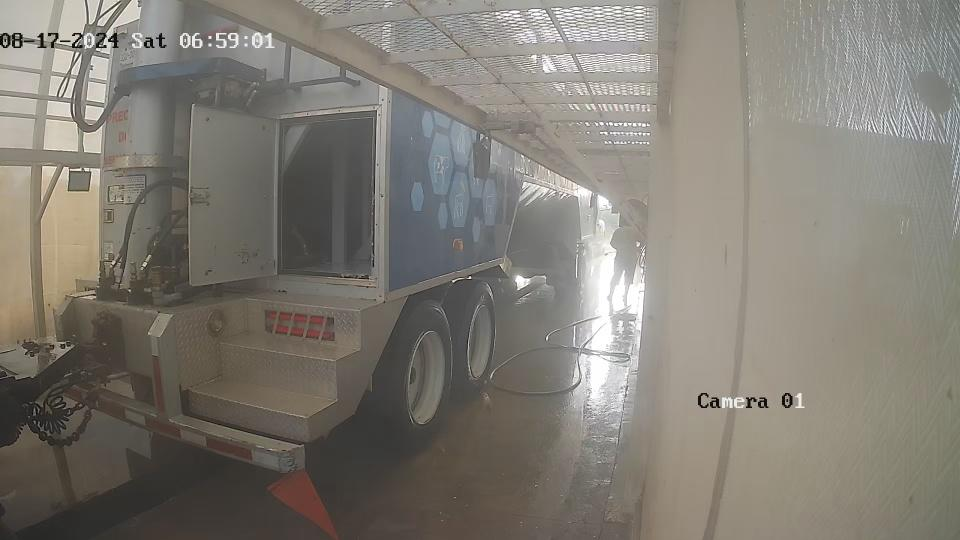

Image ID: frame-19
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': 0.0, 'crocs': 0.0}]


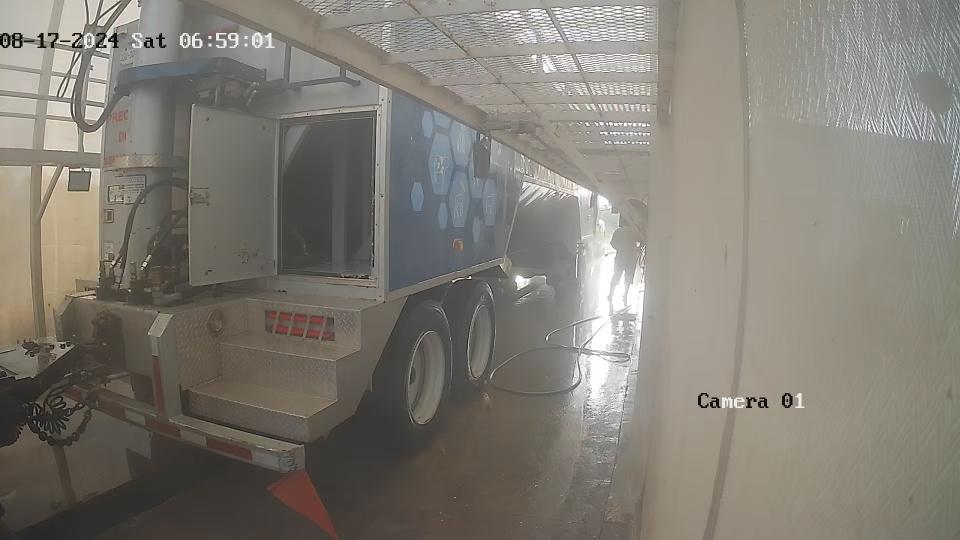

Image ID: frame-27
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': 0.0, 'crocs': 0.0}, {'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': 0.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': 0.0, 'gas_mask': 0.0, 'crocs': 0.0}]


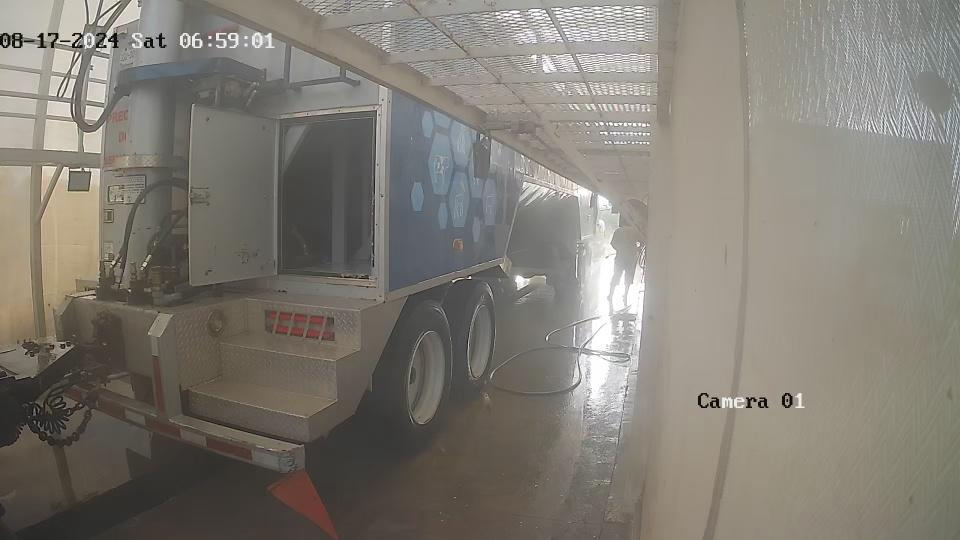

Image ID: frame-31
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 0.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 0.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


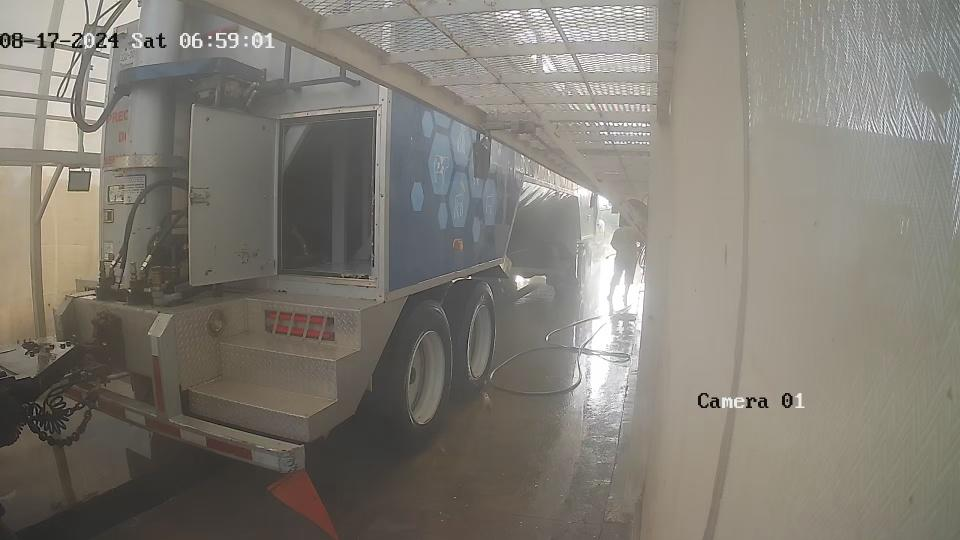

Image ID: frame-3
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 1.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 1.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


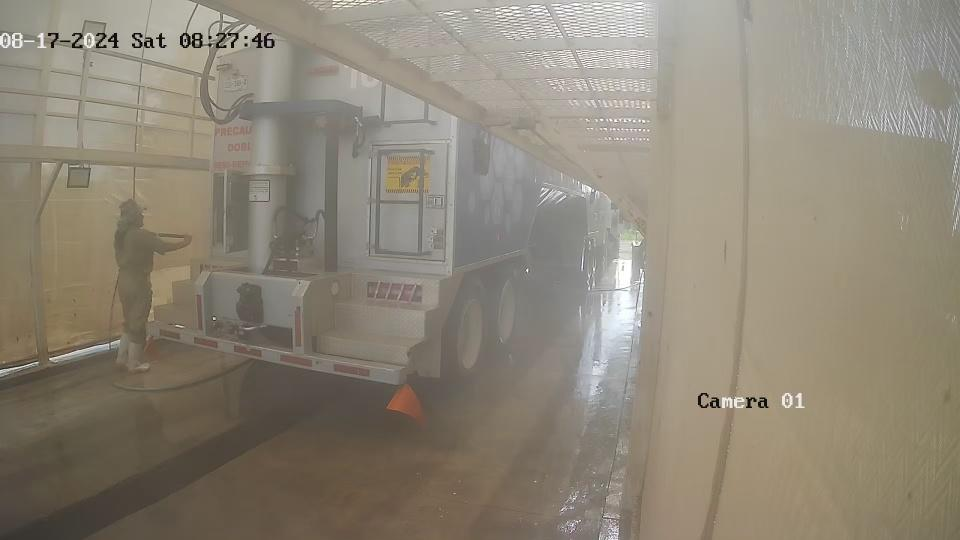

Image ID: frame-7
Detections: [{'white_rubber_boots': 0.0, 'brown_pants': 1.0, 'knee_protector': -1.0, 'brown_long_sleeves_shirt': 1.0, 'glasses': 0.0, 'gloves': -1.0, 'gas_mask': -1.0, 'crocs': 0.0}]


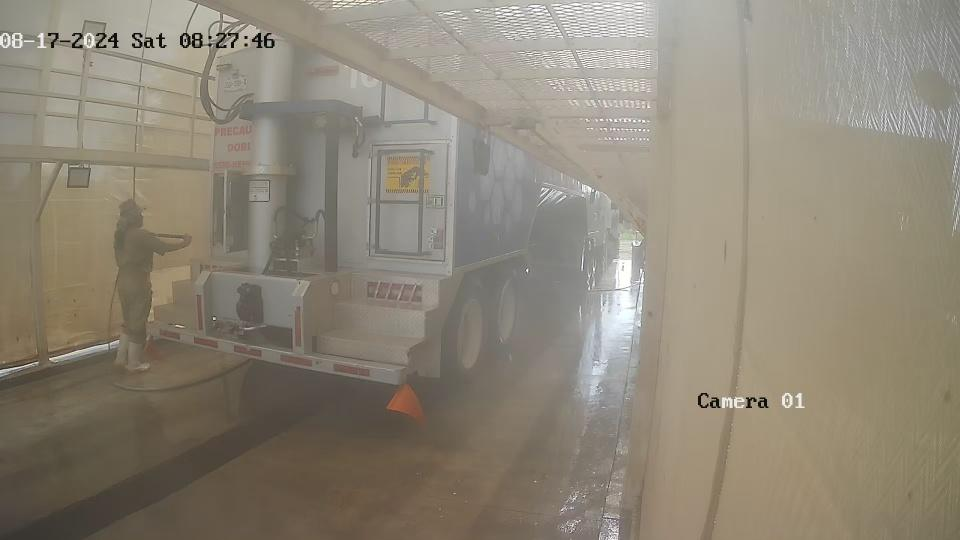

Image ID: frame-5
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.8, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


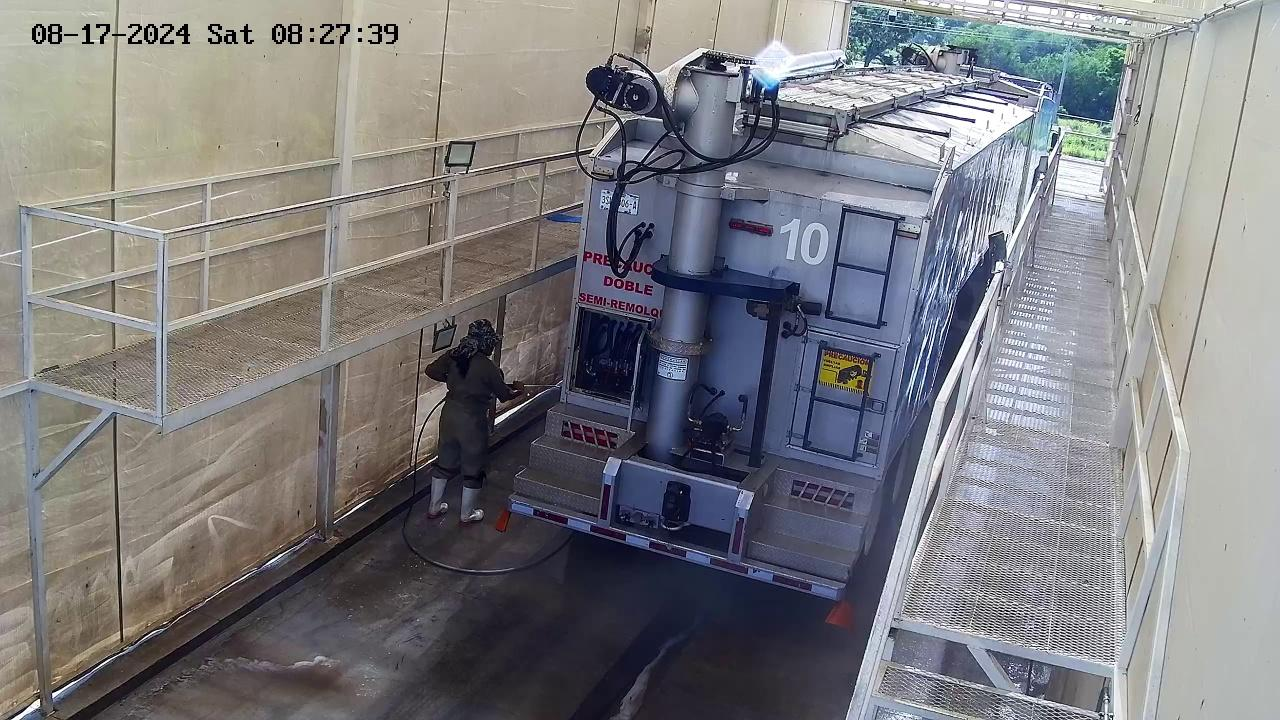

Image ID: frame-9
Detections: [{'white_rubber_boots': 0.8, 'brown_pants': 0.6, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


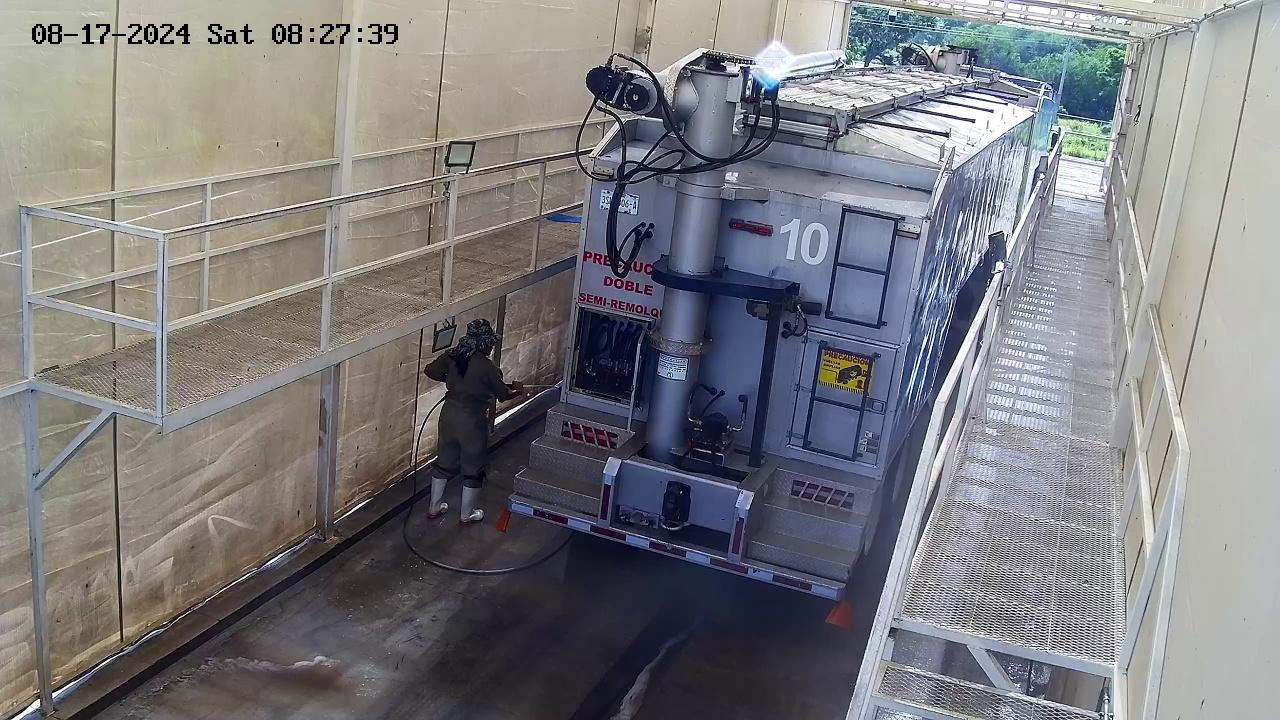

Image ID: frame-25
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.8, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


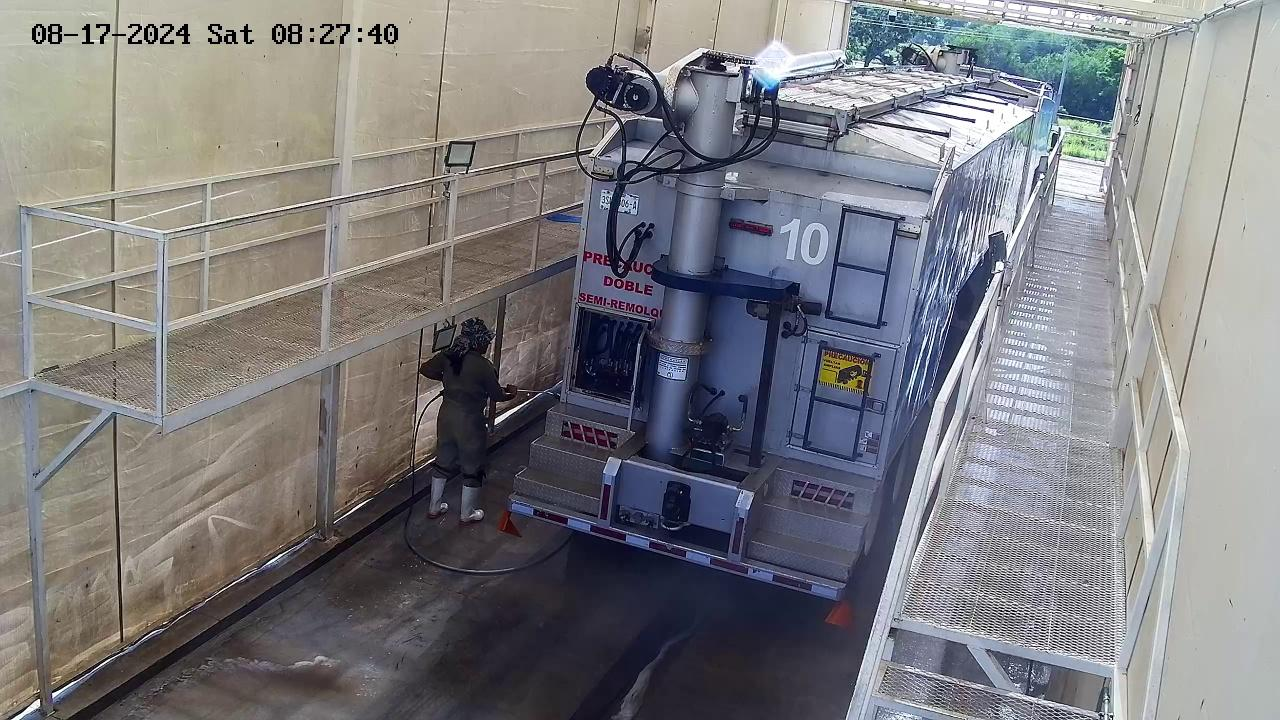

Image ID: frame-65
Detections: [{'white_rubber_boots': 0.9, 'brown_pants': 0.8, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.7, 'glasses': 0.0, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


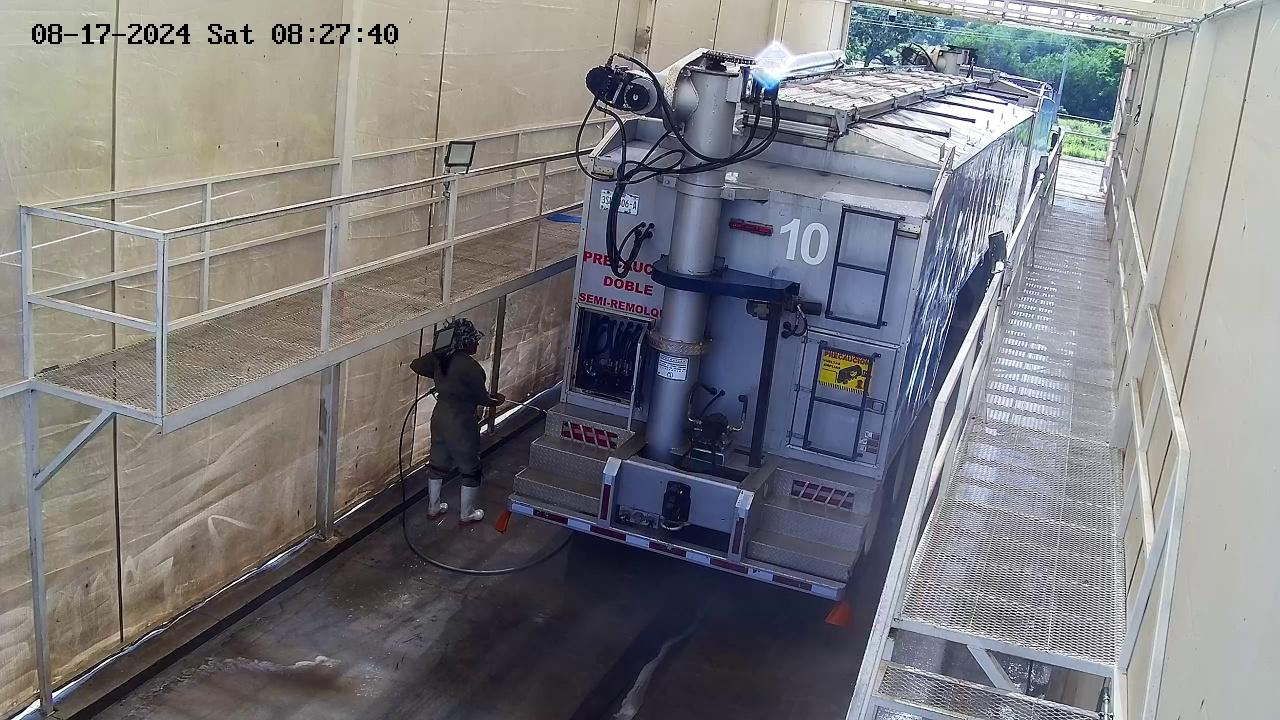

Image ID: frame-91
Detections: [{'white_rubber_boots': 0.8, 'brown_pants': 0.7, 'knee_protector': -0.5, 'brown_long_sleeves_shirt': 0.9, 'glasses': 0.3, 'gloves': -0.5, 'gas_mask': -0.5, 'crocs': 0.0}]


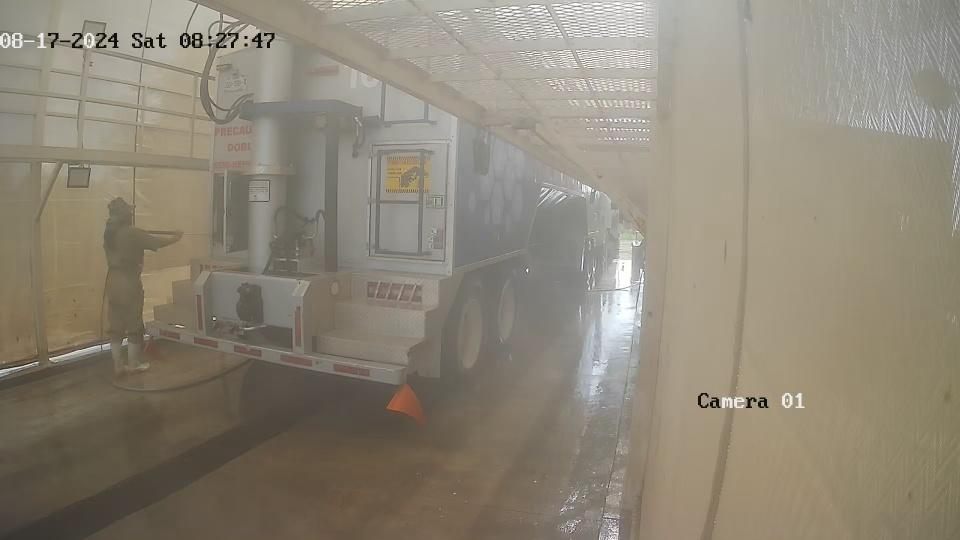

In [11]:
display_predictions_from_jsonl("rtsp_captures_result.jsonl")